In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import pickle
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder as ce
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


In [2]:
#import data
df=pd.read_csv('.//Data//train.csv')
df.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
378    379          20       RL         88.0    11394   Pave   NaN      Reg   
760    761          20       RL         70.0     9100   Pave   NaN      Reg   
1359  1360          20       RL        129.0    16737   Pave   NaN      Reg   
158    159          60       FV        100.0    12552   Pave   NaN      Reg   
132    133          20       RL         75.0     7388   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
378          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
760          Lvl    AllPub  ...        0    NaN   NaN        Shed     450   
1359         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
158          Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
132          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
378       6   2010       New        Partial     394432  
760      10   2009        WD         Normal     127500  
1359      9   2006        WD         Normal     315000  
158       5   2010        WD         Normal     254900  
132       7   2007        WD         Normal     150750  

[5 rows x 81 columns]

In [3]:
#cleansing
#investing
df.shape

(1460, 81)

In [4]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [5]:
df.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [6]:
df.describe(include='all').T

count unique     top  freq          mean           std  \
Id             1460.0    NaN     NaN   NaN         730.5    421.610009   
MSSubClass     1460.0    NaN     NaN   NaN      56.89726     42.300571   
MSZoning         1460      5      RL  1151           NaN           NaN   
LotFrontage    1201.0    NaN     NaN   NaN     70.049958     24.284752   
LotArea        1460.0    NaN     NaN   NaN  10516.828082   9981.264932   
...               ...    ...     ...   ...           ...           ...   
MoSold         1460.0    NaN     NaN   NaN      6.321918      2.703626   
YrSold         1460.0    NaN     NaN   NaN   2007.815753      1.328095   
SaleType         1460      9      WD  1267           NaN           NaN   
SaleCondition    1460      6  Normal  1198           NaN           NaN   
SalePrice      1460.0    NaN     NaN   NaN  180921.19589  79442.502883   

                   min       25%       50%       75%       max  
Id                 1.0    365.75     730.5   1095.25    1460.0  
MSSubClass        20.0      20.0      50.0      70.0     190.0  
MSZoning           NaN       NaN       NaN       NaN       NaN  
LotFrontage       21.0      59.0      69.0      80.0     313.0  
LotArea         1300.0    7553.5    9478.5   11601.5  215245.0  
...                ...       ...       ...       ...       ...  
MoSold             1.0       5.0       6.0       8.0      12.0  
YrSold          2006.0    2007.0    2008.0    2009.0    2010.0  
SaleType           NaN       NaN       NaN       NaN       NaN  
SaleCondition      NaN       NaN       NaN       NaN       NaN  
SalePrice      34900.0  129975.0  163000.0  214000.0  755000.0  

[81 rows x 11 columns]

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#fill missing values
lst=[]
for i in df.columns :
    print(f"for feature {i}",df[i].isna().sum())
    x=df[i].isna().sum()/df.shape[0] * 100
    if x >= 80 :
        lst.append(i)
print(lst)        

for feature Id 0
for feature MSSubClass 0
for feature MSZoning 0
for feature LotFrontage 259
for feature LotArea 0
for feature Street 0
for feature Alley 1369
for feature LotShape 0
for feature LandContour 0
for feature Utilities 0
for feature LotConfig 0
for feature LandSlope 0
for feature Neighborhood 0
for feature Condition1 0
for feature Condition2 0
for feature BldgType 0
for feature HouseStyle 0
for feature OverallQual 0
for feature OverallCond 0
for feature YearBuilt 0
for feature YearRemodAdd 0
for feature RoofStyle 0
for feature RoofMatl 0
for feature Exterior1st 0
for feature Exterior2nd 0
for feature MasVnrType 8
for feature MasVnrArea 8
for feature ExterQual 0
for feature ExterCond 0
for feature Foundation 0
for feature BsmtQual 37
for feature BsmtCond 37
for feature BsmtExposure 38
for feature BsmtFinType1 37
for feature BsmtFinSF1 0
for feature BsmtFinType2 38
for feature BsmtFinSF2 0
for feature BsmtUnfSF 0
for feature TotalBsmtSF 0
for feature Heating 0
for feature Heat

In [11]:
#drop unnecassary columns
df.drop(lst,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
#fill na values
for i in df.columns :
    print(f"for feature {i}",df[i].isna().sum()/df.shape[0] * 100,' %')
    if df[i].dtype == 'O':
        df[i]=df[i].fillna(df[i].mode()[0])
    else :
        df[i]=df[i].fillna(df[i].mean())
df.info()            

for feature Id 0.0  %
for feature MSSubClass 0.0  %
for feature MSZoning 0.0  %
for feature LotFrontage 17.73972602739726  %
for feature LotArea 0.0  %
for feature Street 0.0  %
for feature LotShape 0.0  %
for feature LandContour 0.0  %
for feature Utilities 0.0  %
for feature LotConfig 0.0  %
for feature LandSlope 0.0  %
for feature Neighborhood 0.0  %
for feature Condition1 0.0  %
for feature Condition2 0.0  %
for feature BldgType 0.0  %
for feature HouseStyle 0.0  %
for feature OverallQual 0.0  %
for feature OverallCond 0.0  %
for feature YearBuilt 0.0  %
for feature YearRemodAdd 0.0  %
for feature RoofStyle 0.0  %
for feature RoofMatl 0.0  %
for feature Exterior1st 0.0  %
for feature Exterior2nd 0.0  %
for feature MasVnrType 0.547945205479452  %
for feature MasVnrArea 0.547945205479452  %
for feature ExterQual 0.0  %
for feature ExterCond 0.0  %
for feature Foundation 0.0  %
for feature BsmtQual 2.5342465753424657  %
for feature BsmtCond 2.5342465753424657  %
for feature BsmtExposu

for feature BedroomAbvGr 0.0  %
for feature KitchenAbvGr 0.0  %
for feature KitchenQual 0.0  %
for feature TotRmsAbvGrd 0.0  %
for feature Functional 0.0  %
for feature Fireplaces 0.0  %
for feature FireplaceQu 47.26027397260274  %
for feature GarageType 5.5479452054794525  %
for feature GarageYrBlt 5.5479452054794525  %
for feature GarageFinish 5.5479452054794525  %
for feature GarageCars 0.0  %
for feature GarageArea 0.0  %
for feature GarageQual 5.5479452054794525  %
for feature GarageCond 5.5479452054794525  %
for feature PavedDrive 0.0  %
for feature WoodDeckSF 0.0  %
for feature OpenPorchSF 0.0  %
for feature EnclosedPorch 0.0  %
for feature 3SsnPorch 0.0  %
for feature ScreenPorch 0.0  %
for feature PoolArea 0.0  %
for feature MiscVal 0.0  %
for feature MoSold 0.0  %
for feature YrSold 0.0  %
for feature SaleType 0.0  %
for feature SaleCondition 0.0  %
for feature SalePrice 0.0  %
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 co

In [13]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns
#convert data types of columns
lst_obj=[]
lst_num=[]
for i in df.columns :
    if df[i].dtype == 'O':
        lst_obj.append(i)
    else :
        lst_num.append(i)
for i in lst_num :
    print(f'for feature {i}',df[i].dtype)
    df[i]=df[i].astype(int)
    print()
df.dtypes

for feature id int64

for feature mssubclass int64

for feature lotfrontage float64

for feature lotarea int64

for feature overallqual int64

for feature overallcond int64

for feature yearbuilt int64

for feature yearremodadd int64

for feature masvnrarea float64

for feature bsmtfinsf1 int64

for feature bsmtfinsf2 int64

for feature bsmtunfsf int64

for feature totalbsmtsf int64

for feature 1stflrsf int64

for feature 2ndflrsf int64

for feature lowqualfinsf int64

for feature grlivarea int64

for feature bsmtfullbath int64

for feature bsmthalfbath int64

for feature fullbath int64

for feature halfbath int64

for feature bedroomabvgr int64

for feature kitchenabvgr int64

for feature totrmsabvgrd int64

for feature fireplaces int64

for feature garageyrblt float64

for feature garagecars int64

for feature garagearea int64

for feature wooddecksf int64

for feature openporchsf int64

for feature enclosedporch int64

for feature 3ssnporch int64

for feature screenporch int64

for

id                int32
mssubclass        int32
mszoning         object
lotfrontage       int32
lotarea           int32
                  ...  
mosold            int32
yrsold            int32
saletype         object
salecondition    object
saleprice         int32
Length: 77, dtype: object

In [14]:
#check rows
df.describe()
lst=[]
for i in df.columns:
    # if df[i].select_dtypes('number') :
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        print(df[df[i] < 0 ] )      
#rows are ok

In [15]:
#feature engineering extraction
#domain knowledge feature
def get_class (x):
    if x >= 34900 and x < 129975:
        return 'D'
    elif x >= 129975 and x < 163000 :
        return 'C'
    elif x >= 163000 and x < 214000 :
        return 'B'
    elif x >= 214000 and x <=755000:
        return 'A'
df['class']=df['saleprice'].apply(get_class)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1460 non-null   int32 
 1   mssubclass     1460 non-null   int32 
 2   mszoning       1460 non-null   object
 3   lotfrontage    1460 non-null   int32 
 4   lotarea        1460 non-null   int32 
 5   street         1460 non-null   object
 6   lotshape       1460 non-null   object
 7   landcontour    1460 non-null   object
 8   utilities      1460 non-null   object
 9   lotconfig      1460 non-null   object
 10  landslope      1460 non-null   object
 11  neighborhood   1460 non-null   object
 12  condition1     1460 non-null   object
 13  condition2     1460 non-null   object
 14  bldgtype       1460 non-null   object
 15  housestyle     1460 non-null   object
 16  overallqual    1460 non-null   int32 
 17  overallcond    1460 non-null   int32 
 18  yearbuilt      1460 non-null

In [16]:
#no data and time features ,string operation ,web data or geo spatial 
df[lst_obj]
for i in lst_obj:
    print(f'for feature {i} \n',df[i].value_counts())
    print()
    print('--------------------------------------------------------------------------')
print()
print()
for i in lst_num:
    print(f'for feature {i} \n',df[i].value_counts())
    print()
    print('--------------------------------------------------------------------------')

for feature mszoning 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

--------------------------------------------------------------------------
for feature street 
 Pave    1454
Grvl       6
Name: street, dtype: int64

--------------------------------------------------------------------------
for feature lotshape 
 Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64

--------------------------------------------------------------------------
for feature landcontour 
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64

--------------------------------------------------------------------------
for feature utilities 
 AllPub    1459
NoSeWa       1
Name: utilities, dtype: int64

--------------------------------------------------------------------------
for feature lotconfig 
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: lotconfig, dtype: 

In [17]:
#univaraite analysis
df.info()
lst=['class','mszoning','housestyle','roofstyle','exterior1st','exterior2nd','heating','electrical','garagetype','salecondition']
for i in lst :
    print(f'for feature {i} : \n',df[i].unique())
    print()
    fig=px.histogram(df,i,title=f'{i}',color_discrete_sequence=['green'],marginal='box',text_auto=True)
    fig.update_layout(title_x=0.5)
    fig.show()
    print("-------------------------------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1460 non-null   int32 
 1   mssubclass     1460 non-null   int32 
 2   mszoning       1460 non-null   object
 3   lotfrontage    1460 non-null   int32 
 4   lotarea        1460 non-null   int32 
 5   street         1460 non-null   object
 6   lotshape       1460 non-null   object
 7   landcontour    1460 non-null   object
 8   utilities      1460 non-null   object
 9   lotconfig      1460 non-null   object
 10  landslope      1460 non-null   object
 11  neighborhood   1460 non-null   object
 12  condition1     1460 non-null   object
 13  condition2     1460 non-null   object
 14  bldgtype       1460 non-null   object
 15  housestyle     1460 non-null   object
 16  overallqual    1460 non-null   int32 
 17  overallcond    1460 non-null   int32 
 18  yearbuilt      1460 non-null

-------------------------------------------------------------------------------
for feature mszoning : 
 ['RL' 'RM' 'C (all)' 'FV' 'RH']



-------------------------------------------------------------------------------
for feature housestyle : 
 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']



-------------------------------------------------------------------------------
for feature roofstyle : 
 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']



-------------------------------------------------------------------------------
for feature exterior1st : 
 ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']



-------------------------------------------------------------------------------
for feature exterior2nd : 
 ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']



-------------------------------------------------------------------------------
for feature heating : 
 ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']



-------------------------------------------------------------------------------
for feature electrical : 
 ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']



-------------------------------------------------------------------------------
for feature garagetype : 
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']



-------------------------------------------------------------------------------
for feature salecondition : 
 ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']



-------------------------------------------------------------------------------


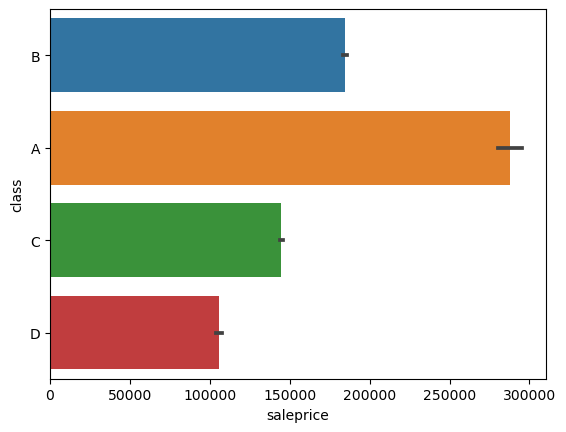

-------------------------------------------------------------------------------


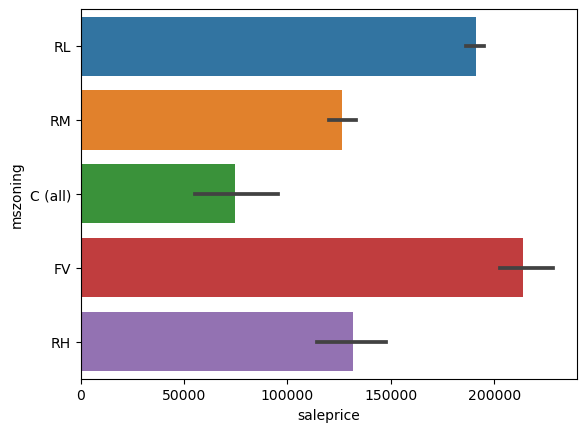

-------------------------------------------------------------------------------


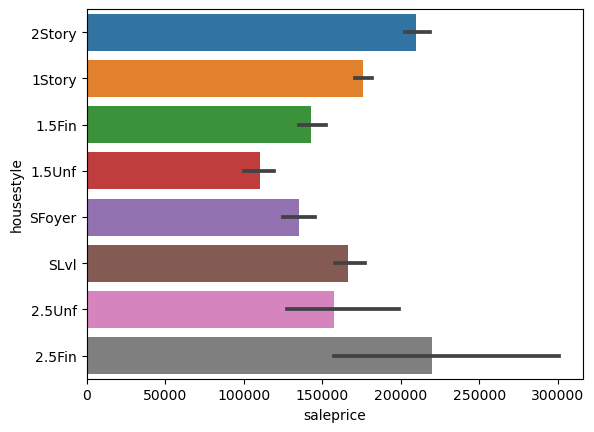

-------------------------------------------------------------------------------


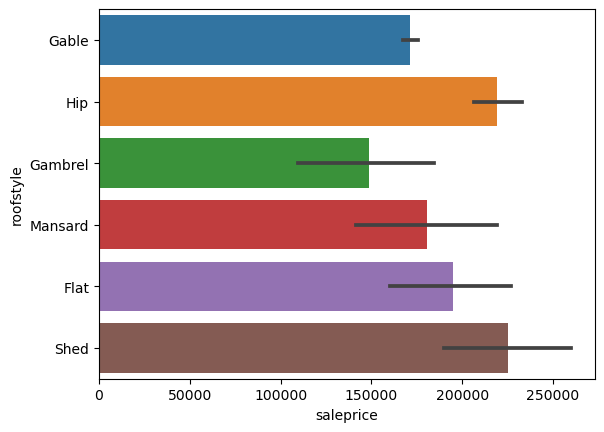

-------------------------------------------------------------------------------


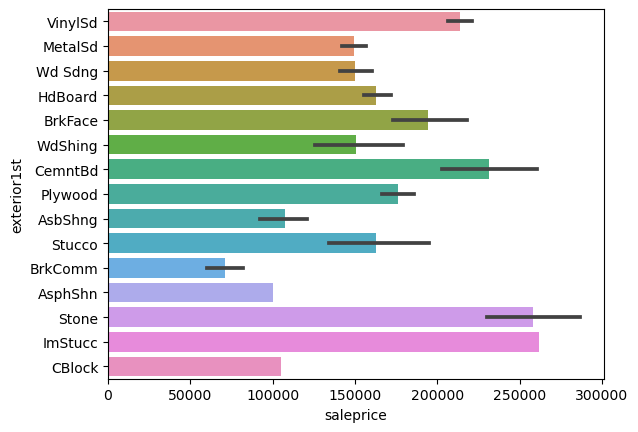

-------------------------------------------------------------------------------


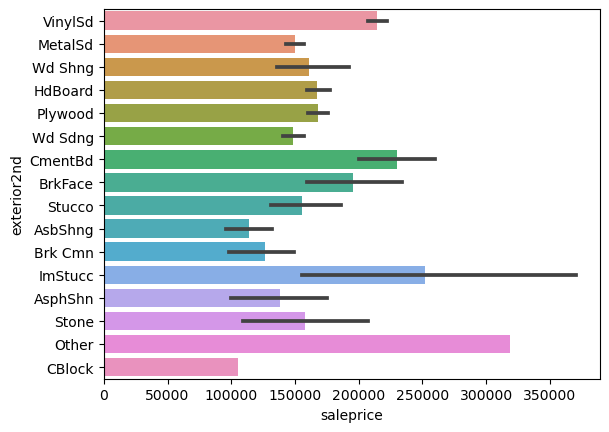

-------------------------------------------------------------------------------


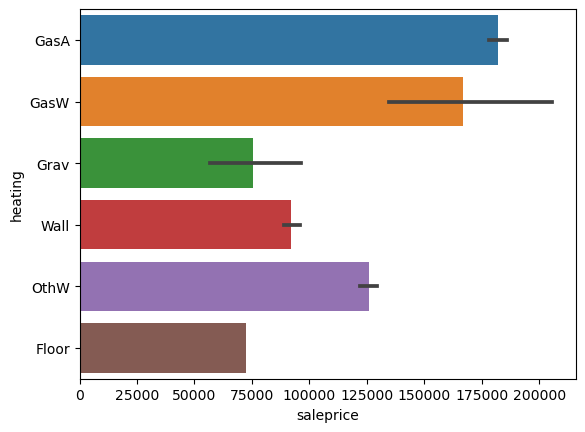

-------------------------------------------------------------------------------


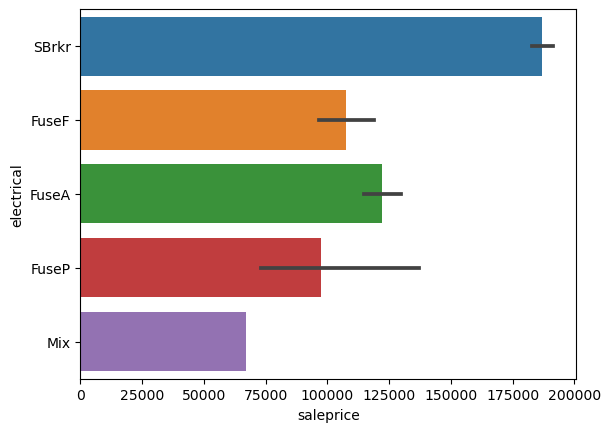

-------------------------------------------------------------------------------


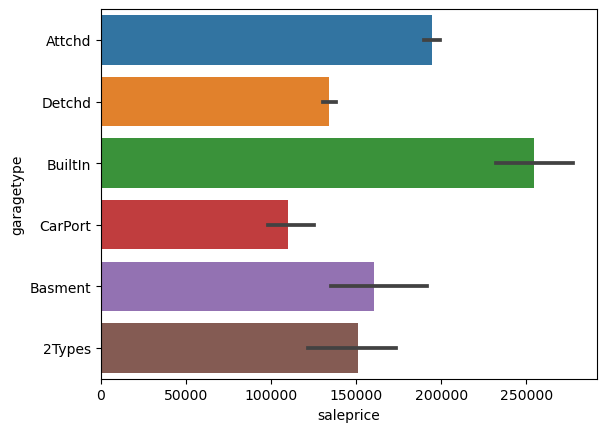

-------------------------------------------------------------------------------


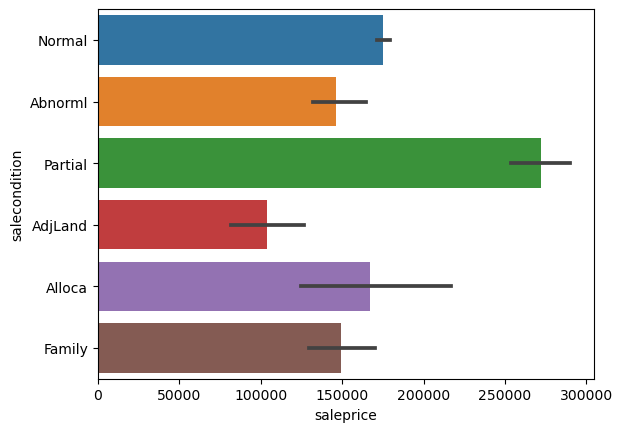

-------------------------------------------------------------------------------


In [18]:
#bivaraite analysis
for i in lst :
    sns.barplot(data=df,x='saleprice',y=i,estimator=np.mean)
    plt.show()
    print("-------------------------------------------------------------------------------")

In [19]:
#detect and handle outliers
#detect
for i in lst_num:
    fig=px.histogram(df,x=i,title=f'{i}',color_discrete_sequence=['green'],marginal='box',text_auto=True)
    fig.update_layout(title_x=0.5)
    fig.show()
    print("-------------------------------------------------------------------------------") 

-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


-------------------------------------------------------------------------------


In [20]:
#handle
lst_num.remove('id')
for i in lst_num :
    #detect
    outliers=detect_outliers(df,0,[i])
    #handel
    df[i].iloc[outliers]=df[i].median()
    df[i]=df[i].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1460 non-null   int32 
 1   mssubclass     1460 non-null   int32 
 2   mszoning       1460 non-null   object
 3   lotfrontage    1460 non-null   int32 
 4   lotarea        1460 non-null   int32 
 5   street         1460 non-null   object
 6   lotshape       1460 non-null   object
 7   landcontour    1460 non-null   object
 8   utilities      1460 non-null   object
 9   lotconfig      1460 non-null   object
 10  landslope      1460 non-null   object
 11  neighborhood   1460 non-null   object
 12  condition1     1460 non-null   object
 13  condition2     1460 non-null   object
 14  bldgtype       1460 non-null   object
 15  housestyle     1460 non-null   object
 16  overallqual    1460 non-null   int32 
 17  overallcond    1460 non-null   int32 
 18  yearbuilt      1460 non-null

In [21]:
df

id  mssubclass mszoning  lotfrontage  lotarea street lotshape  \
0        1          60       RL           65     8450   Pave      Reg   
1        2          20       RL           80     9600   Pave      Reg   
2        3          60       RL           68    11250   Pave      IR1   
3        4          70       RL           60     9550   Pave      IR1   
4        5          60       RL           84    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL           62     7917   Pave      Reg   
1456  1457          20       RL           85    13175   Pave      Reg   
1457  1458          70       RL           66     9042   Pave      Reg   
1458  1459          20       RL           68     9717   Pave      Reg   
1459  1460          20       RL           75     9937   Pave      Reg   

     landcontour utilities lotconfig  ... 3ssnporch screenporch poolarea  \
0            Lvl    AllPub    Inside  ...         0           0        0   
1            Lvl    AllPub       FR2  ...         0           0        0   
2            Lvl    AllPub    Inside  ...         0           0        0   
3            Lvl    AllPub    Corner  ...         0           0        0   
4            Lvl    AllPub       FR2  ...         0           0        0   
...          ...       ...       ...  ...       ...         ...      ...   
1455         Lvl    AllPub    Inside  ...         0           0        0   
1456         Lvl    AllPub    Inside  ...         0           0        0   
1457         Lvl    AllPub    Inside  ...         0           0        0   
1458         Lvl    AllPub    Inside  ...         0           0        0   
1459         Lvl    AllPub    Inside  ...         0           0        0   

     miscval mosold yrsold  saletype  salecondition  saleprice  class  
0          0      2   2008        WD         Normal     208500      B  
1          0      5   2007        WD         Normal     181500      B  
2          0      9   2008        WD         Normal     223500      A  
3          0      2   2006        WD        Abnorml     140000      C  
4          0     12   2008        WD         Normal     250000      A  
...      ...    ...    ...       ...            ...        ...    ...  
1455       0      8   2007        WD         Normal     175000      B  
1456       0      2   2010        WD         Normal     210000      B  
1457       0      5   2010        WD         Normal     266500      A  
1458       0      4   2010        WD         Normal     142125      C  
1459       0      6   2008        WD         Normal     147500      C  

[1460 rows x 78 columns]

<AxesSubplot:>

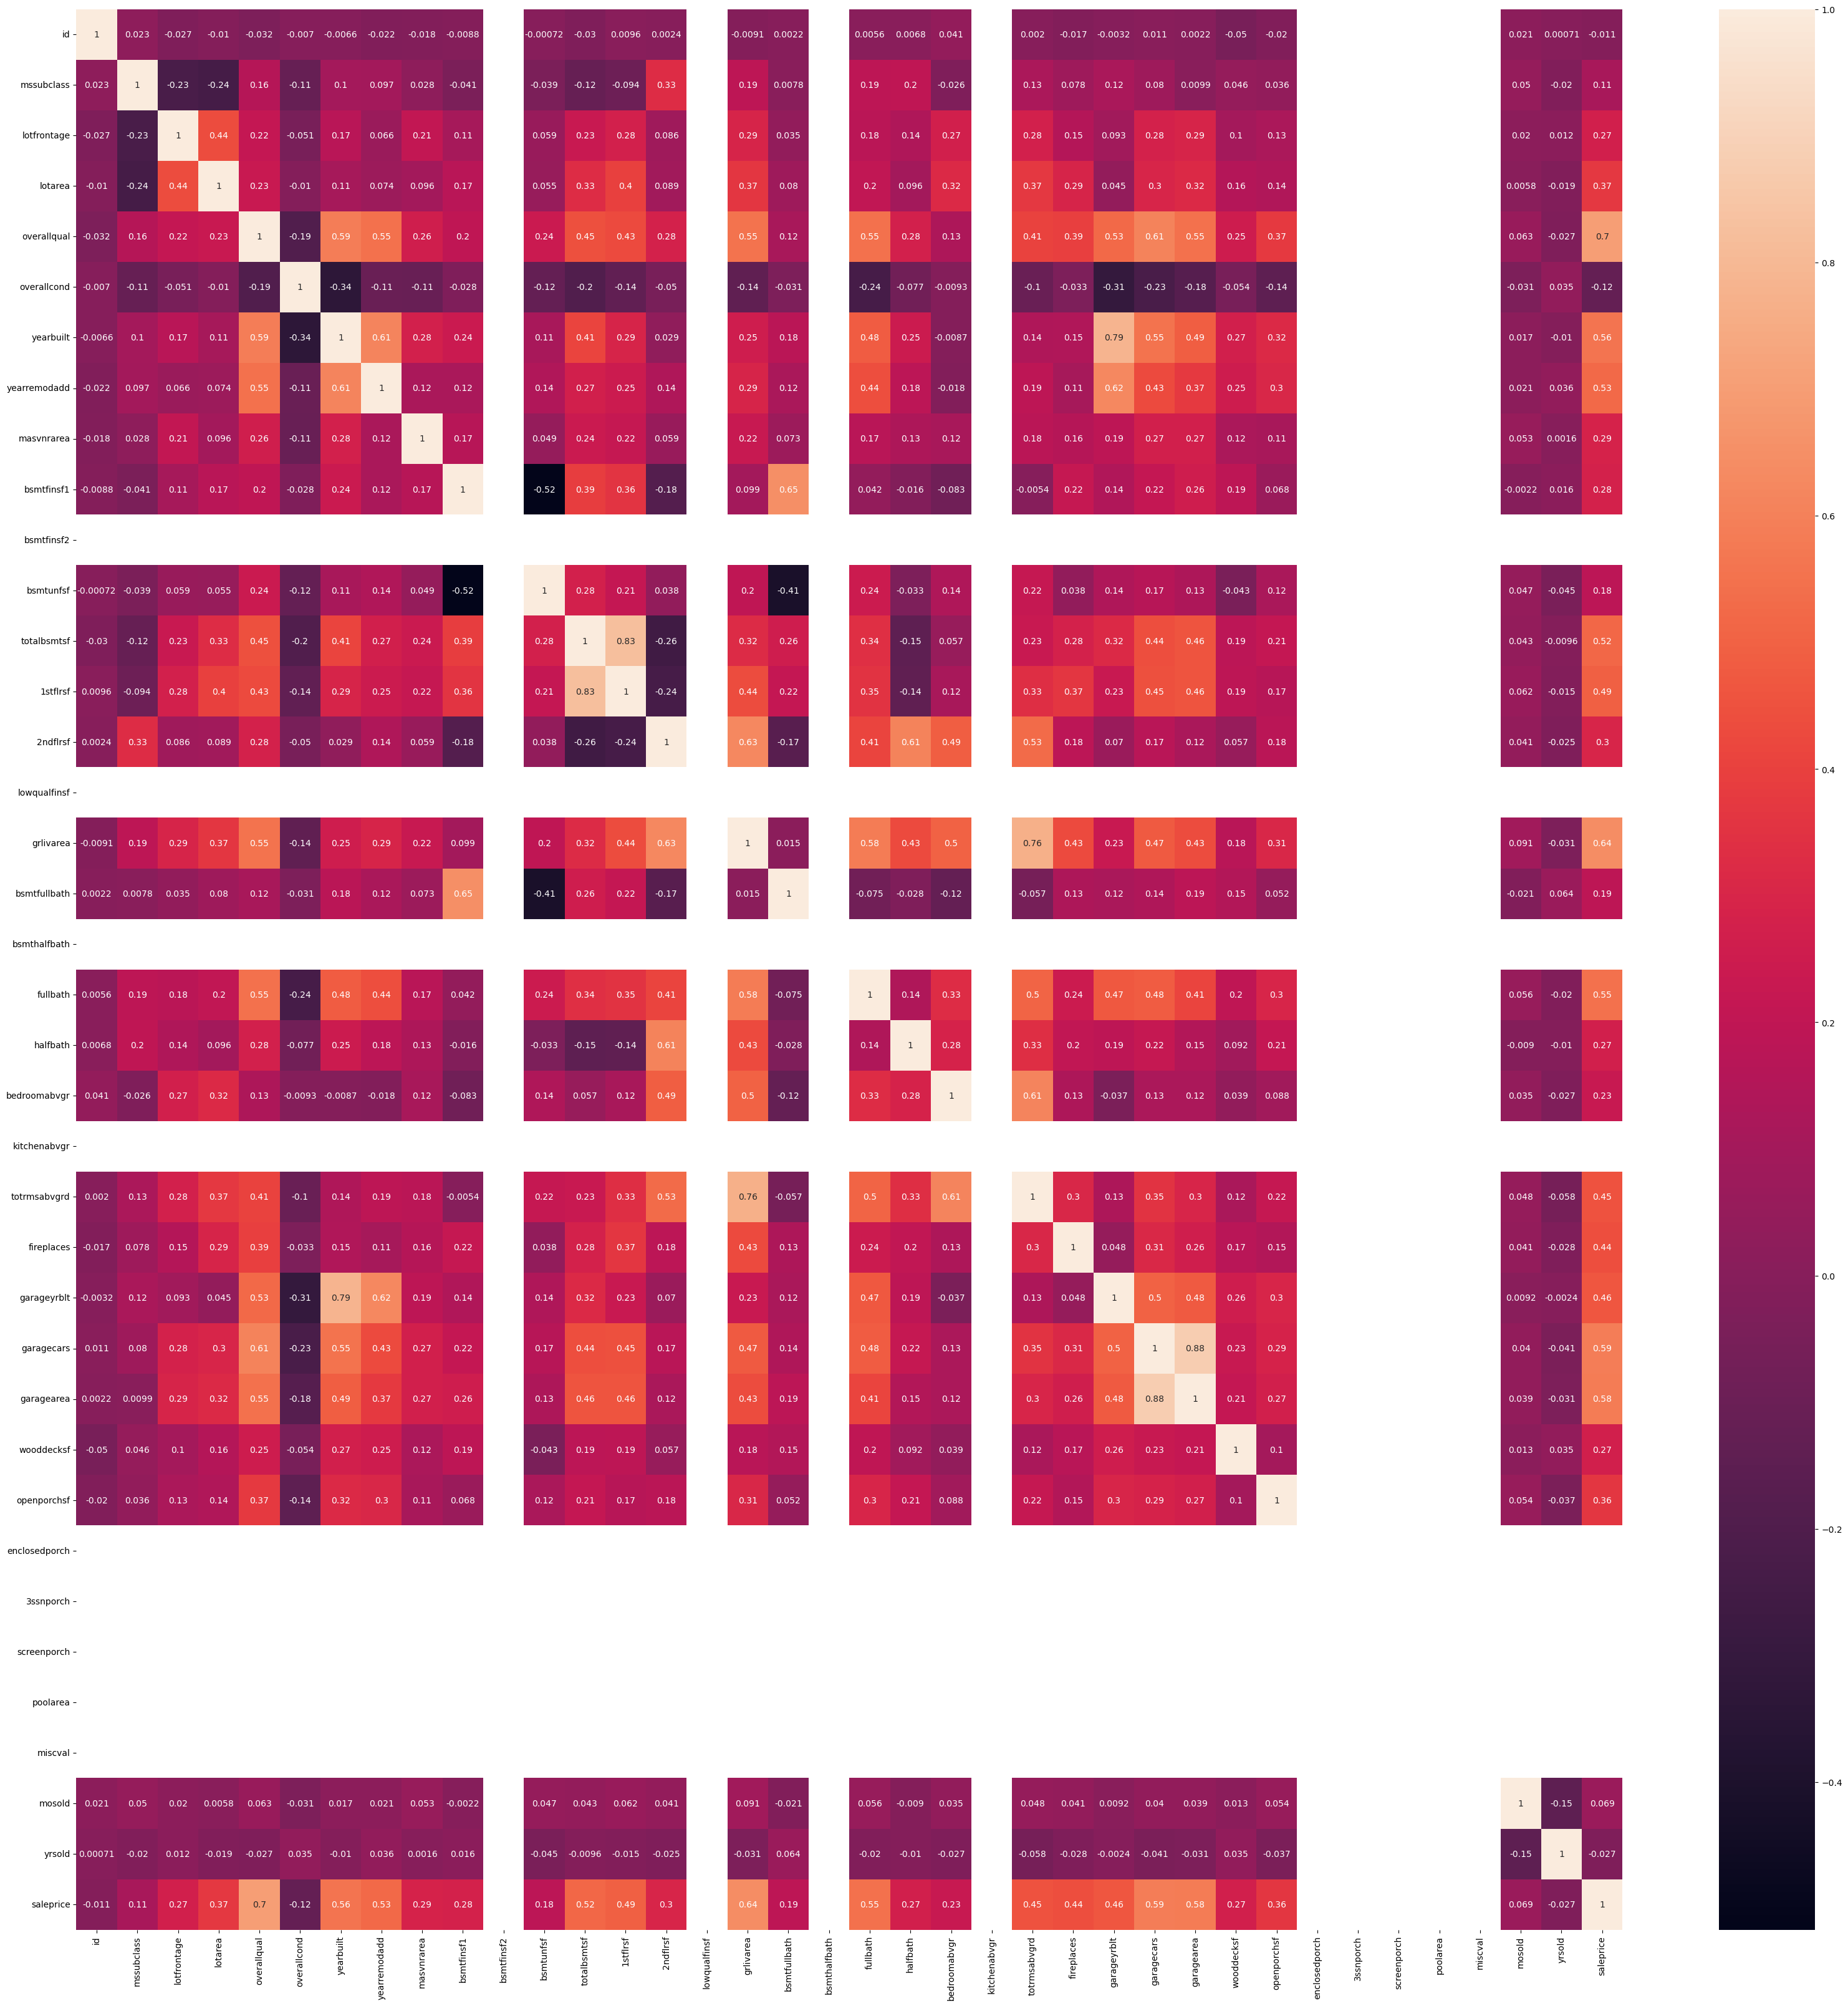

In [22]:
#correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True )

In [23]:
#remove dependent features
df.drop('class',axis=1,inplace=True)
#work with categorical data 
#check and decide the encoding stategy
#update objects list
lst_obj=[]
for i in df.columns :
    if df[i].dtype == 'O':
        lst_obj.append(i)
for i in lst_obj:
    print(f"for feature {i}\n",df[i].value_counts())
    print()
    print("-----------------------------------------------------------------------------")

for feature mszoning
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

-----------------------------------------------------------------------------
for feature street
 Pave    1454
Grvl       6
Name: street, dtype: int64

-----------------------------------------------------------------------------
for feature lotshape
 Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64

-----------------------------------------------------------------------------
for feature landcontour
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64

-----------------------------------------------------------------------------
for feature utilities
 AllPub    1459
NoSeWa       1
Name: utilities, dtype: int64

-----------------------------------------------------------------------------
for feature lotconfig
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: lotconfig

In [24]:
df.drop(['street','utilities'],axis=1,inplace=True)
df_c=df.copy()
df_c.isna().sum()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1460 non-null   int32 
 1   mssubclass     1460 non-null   int32 
 2   mszoning       1460 non-null   object
 3   lotfrontage    1460 non-null   int32 
 4   lotarea        1460 non-null   int32 
 5   lotshape       1460 non-null   object
 6   landcontour    1460 non-null   object
 7   lotconfig      1460 non-null   object
 8   landslope      1460 non-null   object
 9   neighborhood   1460 non-null   object
 10  condition1     1460 non-null   object
 11  condition2     1460 non-null   object
 12  bldgtype       1460 non-null   object
 13  housestyle     1460 non-null   object
 14  overallqual    1460 non-null   int32 
 15  overallcond    1460 non-null   int32 
 16  yearbuilt      1460 non-null   int32 
 17  yearremodadd   1460 non-null   int32 
 18  roofstyle      1460 non-null

In [25]:
#work with ordinal
dic={
    
  'RL' : 0 ,
  'RM' : 1,
  'FV' : 2,
  'RH' : 3  
    
    
}
df_c['mszoning']=df_c['mszoning'].map(dic)
df_c

id  mssubclass  mszoning  lotfrontage  lotarea lotshape landcontour  \
0        1          60       0.0           65     8450      Reg         Lvl   
1        2          20       0.0           80     9600      Reg         Lvl   
2        3          60       0.0           68    11250      IR1         Lvl   
3        4          70       0.0           60     9550      IR1         Lvl   
4        5          60       0.0           84    14260      IR1         Lvl   
...    ...         ...       ...          ...      ...      ...         ...   
1455  1456          60       0.0           62     7917      Reg         Lvl   
1456  1457          20       0.0           85    13175      Reg         Lvl   
1457  1458          70       0.0           66     9042      Reg         Lvl   
1458  1459          20       0.0           68     9717      Reg         Lvl   
1459  1460          20       0.0           75     9937      Reg         Lvl   

     lotconfig landslope neighborhood  ... enclosedporch 3ssnporch  \
0       Inside       Gtl      CollgCr  ...             0         0   
1          FR2       Gtl      Veenker  ...             0         0   
2       Inside       Gtl      CollgCr  ...             0         0   
3       Corner       Gtl      Crawfor  ...             0         0   
4          FR2       Gtl      NoRidge  ...             0         0   
...        ...       ...          ...  ...           ...       ...   
1455    Inside       Gtl      Gilbert  ...             0         0   
1456    Inside       Gtl       NWAmes  ...             0         0   
1457    Inside       Gtl      Crawfor  ...             0         0   
1458    Inside       Gtl        NAmes  ...             0         0   
1459    Inside       Gtl      Edwards  ...             0         0   

     screenporch poolarea  miscval  mosold  yrsold  saletype salecondition  \
0              0        0        0       2    2008        WD        Normal   
1              0        0        0       5    2007        WD        Normal   
2              0        0        0       9    2008        WD        Normal   
3              0        0        0       2    2006        WD       Abnorml   
4              0        0        0      12    2008        WD        Normal   
...          ...      ...      ...     ...     ...       ...           ...   
1455           0        0        0       8    2007        WD        Normal   
1456           0        0        0       2    2010        WD        Normal   
1457           0        0        0       5    2010        WD        Normal   
1458           0        0        0       4    2010        WD        Normal   
1459           0        0        0       6    2008        WD        Normal   

     saleprice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1460 rows x 75 columns]

In [26]:
dic={
  'Reg' :0,
  'IR1' :1,
  'IR2' :2,
  'IR3' :3
    
    
}
df_c['lotshape']=df_c['lotshape'].map(dic)
df_c

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape landcontour  \
0        1          60       0.0           65     8450         0         Lvl   
1        2          20       0.0           80     9600         0         Lvl   
2        3          60       0.0           68    11250         1         Lvl   
3        4          70       0.0           60     9550         1         Lvl   
4        5          60       0.0           84    14260         1         Lvl   
...    ...         ...       ...          ...      ...       ...         ...   
1455  1456          60       0.0           62     7917         0         Lvl   
1456  1457          20       0.0           85    13175         0         Lvl   
1457  1458          70       0.0           66     9042         0         Lvl   
1458  1459          20       0.0           68     9717         0         Lvl   
1459  1460          20       0.0           75     9937         0         Lvl   

     lotconfig landslope neighborhood  ... enclosedporch 3ssnporch  \
0       Inside       Gtl      CollgCr  ...             0         0   
1          FR2       Gtl      Veenker  ...             0         0   
2       Inside       Gtl      CollgCr  ...             0         0   
3       Corner       Gtl      Crawfor  ...             0         0   
4          FR2       Gtl      NoRidge  ...             0         0   
...        ...       ...          ...  ...           ...       ...   
1455    Inside       Gtl      Gilbert  ...             0         0   
1456    Inside       Gtl       NWAmes  ...             0         0   
1457    Inside       Gtl      Crawfor  ...             0         0   
1458    Inside       Gtl        NAmes  ...             0         0   
1459    Inside       Gtl      Edwards  ...             0         0   

     screenporch poolarea  miscval  mosold  yrsold  saletype salecondition  \
0              0        0        0       2    2008        WD        Normal   
1              0        0        0       5    2007        WD        Normal   
2              0        0        0       9    2008        WD        Normal   
3              0        0        0       2    2006        WD       Abnorml   
4              0        0        0      12    2008        WD        Normal   
...          ...      ...      ...     ...     ...       ...           ...   
1455           0        0        0       8    2007        WD        Normal   
1456           0        0        0       2    2010        WD        Normal   
1457           0        0        0       5    2010        WD        Normal   
1458           0        0        0       4    2010        WD        Normal   
1459           0        0        0       6    2008        WD        Normal   

     saleprice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1460 rows x 75 columns]

In [27]:
df_c.drop(['condition2','roofmatl','bsmtfintype2','heating'],axis=1,inplace=True)

In [28]:
lst_small=['landcontour','lotconfig','landslope','bldgtype','roofstyle','masvnrtype','exterqual','extercond','bsmtqual',
          'bsmtcond','bsmtexposure','heatingqc','centralair','electrical','kitchenqual','fireplacequ','garagetype',
          'garagefinish','garagequal','garagecond','paveddrive','salecondition', 'foundation'
          ]    
lst_big=['neighborhood','condition1','housestyle','exterior1st','exterior2nd','bsmtfintype1','functional','saletype']

In [29]:
#work with nomial
#one hot encodng
#create one hot encoding object
ohe = OneHotEncoder(sparse=False )
df_ohe = pd.DataFrame(ohe.fit_transform(df_c[lst_small]) , columns=ohe.get_feature_names_out())
df_ohe

landcontour_Bnk  landcontour_HLS  landcontour_Low  landcontour_Lvl  \
0                 0.0              0.0              0.0              1.0   
1                 0.0              0.0              0.0              1.0   
2                 0.0              0.0              0.0              1.0   
3                 0.0              0.0              0.0              1.0   
4                 0.0              0.0              0.0              1.0   
...               ...              ...              ...              ...   
1455              0.0              0.0              0.0              1.0   
1456              0.0              0.0              0.0              1.0   
1457              0.0              0.0              0.0              1.0   
1458              0.0              0.0              0.0              1.0   
1459              0.0              0.0              0.0              1.0   

      lotconfig_Corner  lotconfig_CulDSac  lotconfig_FR2  lotconfig_FR3  \
0                  0.0                0.0            0.0            0.0   
1                  0.0                0.0            1.0            0.0   
2                  0.0                0.0            0.0            0.0   
3                  1.0                0.0            0.0            0.0   
4                  0.0                0.0            1.0            0.0   
...                ...                ...            ...            ...   
1455               0.0                0.0            0.0            0.0   
1456               0.0                0.0            0.0            0.0   
1457               0.0                0.0            0.0            0.0   
1458               0.0                0.0            0.0            0.0   
1459               0.0                0.0            0.0            0.0   

      lotconfig_Inside  landslope_Gtl  ...  salecondition_Alloca  \
0                  1.0            1.0  ...                   0.0   
1                  0.0            1.0  ...                   0.0   
2                  1.0            1.0  ...                   0.0   
3                  0.0            1.0  ...                   0.0   
4                  0.0            1.0  ...                   0.0   
...                ...            ...  ...                   ...   
1455               1.0            1.0  ...                   0.0   
1456               1.0            1.0  ...                   0.0   
1457               1.0            1.0  ...                   0.0   
1458               1.0            1.0  ...                   0.0   
1459               1.0            1.0  ...                   0.0   

      salecondition_Family  salecondition_Normal  salecondition_Partial  \
0                      0.0                   1.0                    0.0   
1                      0.0                   1.0                    0.0   
2                      0.0                   1.0                    0.0   
3                      0.0                   0.0                    0.0   
4                      0.0                   1.0                    0.0   
...                    ...                   ...                    ...   
1455                   0.0                   1.0                    0.0   
1456                   0.0                   1.0                    0.0   
1457                   0.0                   1.0                    0.0   
1458                   0.0                   1.0                    0.0   
1459                   0.0                   1.0                    0.0   

      foundation_BrkTil  foundation_CBlock  foundation_PConc  foundation_Slab  \
0                   0.0                0.0               1.0              0.0   
1                   0.0                1.0               0.0              0.0   
2                   0.0                0.0               1.0              0.0   
3                   1.0                0.0               0.0              0.0   
4                   0.0                0.0               1.0         

In [30]:
#binary encoding
#create binary encoding object
from category_encoders import BinaryEncoder
be = BinaryEncoder()
be_df = be.fit_transform(df_c[lst_big])
be_df

neighborhood_0  neighborhood_1  neighborhood_2  neighborhood_3  \
0                  0               0               0               0   
1                  0               0               0               1   
2                  0               0               0               0   
3                  0               0               0               1   
4                  0               0               1               0   
...              ...             ...             ...             ...   
1455               1               0               0               1   
1456               0               0               1               1   
1457               0               0               0               1   
1458               0               1               1               0   
1459               1               0               0               0   

      neighborhood_4  condition1_0  condition1_1  condition1_2  condition1_3  \
0                  1             0             0             0             1   
1                  0             0             0             1             0   
2                  1             0             0             0             1   
3                  1             0             0             0             1   
4                  0             0             0             0             1   
...              ...           ...           ...           ...           ...   
1455               0             0             0             0             1   
1456               1             0             0             0             1   
1457               1             0             0             0             1   
1458               0             0             0             0             1   
1459               0             0             0             0             1   

      housestyle_0  ...  bsmtfintype1_0  bsmtfintype1_1  bsmtfintype1_2  \
0                0  ...               0               0               1   
1                0  ...               0               1               0   
2                0  ...               0               0               1   
3                0  ...               0               1               0   
4                0  ...               0               0               1   
...            ...  ...             ...             ...             ...   
1455             0  ...               0               1               1   
1456             0  ...               0               1               0   
1457             0  ...               0               0               1   
1458             0  ...               0               0               1   
1459             0  ...               1               0               1   

      functional_0  functional_1  functional_2  saletype_0  saletype_1  \
0                0             0             1           0           0   
1                0             0             1           0           0   
2                0             0             1           0           0   
3                0             0             1           0           0   
4                0             0             1           0           0   
...            ...           ...           ...         ...         ...   
1455             0             0             1           0           0   
1456             0             1             0           0           0   
1457             0             0             1           0           0   
1458             0             0             1           0           0   
1459             0             0             1           0           0   

      saletype_2  saletype_3  
0              0           1  
1              0           1  
2              0           1  
3              0           1  
4              0           1  
...          ...         ...  
1455           0           1  
1456           0           1  
1457           0           1  
1458           0           1  
1459           0           1  

[1460 rows x 32 c

In [31]:
df_c = pd.concat([df_c , df_ohe ,be_df ] , axis = 1)
df_c.drop(lst_small + lst_big , axis = 1 , inplace = True )
df_c

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape  overallqual  \
0        1          60       0.0           65     8450         0            7   
1        2          20       0.0           80     9600         0            6   
2        3          60       0.0           68    11250         1            7   
3        4          70       0.0           60     9550         1            7   
4        5          60       0.0           84    14260         1            8   
...    ...         ...       ...          ...      ...       ...          ...   
1455  1456          60       0.0           62     7917         0            6   
1456  1457          20       0.0           85    13175         0            6   
1457  1458          70       0.0           66     9042         0            7   
1458  1459          20       0.0           68     9717         0            5   
1459  1460          20       0.0           75     9937         0            5   

      overallcond  yearbuilt  yearremodadd  ...  bsmtfintype1_0  \
0               5       2003          2003  ...               0   
1               5       1976          1976  ...               0   
2               5       2001          2002  ...               0   
3               5       1915          1970  ...               0   
4               5       2000          2000  ...               0   
...           ...        ...           ...  ...             ...   
1455            5       1999          2000  ...               0   
1456            6       1978          1988  ...               0   
1457            5       1941          2006  ...               0   
1458            6       1950          1996  ...               0   
1459            6       1965          1965  ...               1   

      bsmtfintype1_1  bsmtfintype1_2  functional_0  functional_1  \
0                  0               1             0             0   
1                  1               0             0             0   
2                  0               1             0             0   
3                  1               0             0             0   
4                  0               1             0             0   
...              ...             ...           ...           ...   
1455               1               1             0             0   
1456               1               0             0             1   
1457               0               1             0             0   
1458               0               1             0             0   
1459               0               1             0             0   

      functional_2  saletype_0  saletype_1  saletype_2  saletype_3  
0                1           0           0           0           1  
1                1           0           0           0           1  
2                1           0           0           0           1  
3                1           0           0           0           1  
4                1           0           0           0           1  
...            ...         ...         ...         ...         ...  
1455             1           0           0           0           1  
1456             0           0           0           0           1  
1457             1           0           0           0           1  
1458             1           0           0           0           1  
1459             1           0           0           0           1  

[1460 rows x 175 columns]

In [32]:
#check if there are no categorical data left
lst_obj_c=[]
for i in df_c.columns:
    if df_c[i].dtype == 'O':
        lst_obj_c.append(i)
print(lst_obj_c)  
if len(lst_obj_c) == 0 :
    print('There is no categorical data left')
else :
    print('There is categorical data left') 
    

[]
There is no categorical data left


In [33]:
#fill missing values and convert to int after encoding phase
#fill missing values
lst=[]
for i in df_c.columns :
    print(f"for feature {i}",df_c[i].isna().sum())
    x=df_c[i].isna().sum()/df_c.shape[0] * 100
    if x >= 80 :
        lst.append(i)
print(lst)        
#fill na values
for i in df_c.columns :
    print(f"for feature {i}",df_c[i].isna().sum()/df_c.shape[0] * 100,' %')
    if df_c[i].dtype == 'O':
        df_c[i]=df_c[i].fillna(df_c[i].mode()[0])
    else :
        df_c[i]=df_c[i].fillna(df_c[i].mean())
for i in df_c.columns :
    if df_c[i].dtype == 'float64':
        df_c[i]=df_c[i].astype(int)
df_c.info()        

for feature id 0
for feature mssubclass 0
for feature mszoning 10
for feature lotfrontage 0
for feature lotarea 0
for feature lotshape 0
for feature overallqual 0
for feature overallcond 0
for feature yearbuilt 0
for feature yearremodadd 0
for feature masvnrarea 0
for feature bsmtfinsf1 0
for feature bsmtfinsf2 0
for feature bsmtunfsf 0
for feature totalbsmtsf 0
for feature 1stflrsf 0
for feature 2ndflrsf 0
for feature lowqualfinsf 0
for feature grlivarea 0
for feature bsmtfullbath 0
for feature bsmthalfbath 0
for feature fullbath 0
for feature halfbath 0
for feature bedroomabvgr 0
for feature kitchenabvgr 0
for feature totrmsabvgrd 0
for feature fireplaces 0
for feature garageyrblt 0
for feature garagecars 0
for feature garagearea 0
for feature wooddecksf 0
for feature openporchsf 0
for feature enclosedporch 0
for feature 3ssnporch 0
for feature screenporch 0
for feature poolarea 0
for feature miscval 0
for feature mosold 0
for feature yrsold 0
for feature saleprice 0
for feature land

In [34]:
#split data
x , y = df_c.drop(['saleprice'] , axis = 1 ) , df_c['saleprice']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 0)

In [35]:
x_train

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape  overallqual  \
618    619          20         0           90    11694         0            9   
870    871          20         0           60     6600         0            5   
92      93          30         0           80    13360         1            5   
817    818          20         0           70    13265         1            8   
302    303          20         0           70    13704         1            7   
...    ...         ...       ...          ...      ...       ...          ...   
763    764          60         0           82     9430         0            8   
835    836          20         0           60     9600         0            4   
1216  1217          90         1           68     8930         0            6   
559    560         120         0           70     3196         0            7   
684    685          60         0           58    16770         2            7   

      overallcond  yearbuilt  yearremodadd  ...  bsmtfintype1_0  \
618             5       2007          2007  ...               0   
870             5       1962          1962  ...               0   
92              7       1921          2006  ...               0   
817             5       2002          2002  ...               0   
302             5       2001          2002  ...               0   
...           ...        ...           ...  ...             ...   
763             5       1999          1999  ...               0   
835             7       1950          1995  ...               1   
1216            5       1978          1978  ...               0   
559             5       2003          2004  ...               0   
684             5       1998          1998  ...               0   

      bsmtfintype1_1  bsmtfintype1_2  functional_0  functional_1  \
618                0               1             0             0   
870                1               1             0             0   
92                 1               0             0             0   
817                0               1             0             0   
302                1               1             0             0   
...              ...             ...           ...           ...   
763                0               1             0             0   
835                0               1             1             0   
1216               1               1             0             0   
559                1               1             0             0   
684                1               1             0             0   

      functional_2  saletype_0  saletype_1  saletype_2  saletype_3  
618              1           0           0           1           0  
870              1           0           0           0           1  
92               1           0           0           0           1  
817              1           0           0           0           1  
302              1           0           0           0           1  
...            ...         ...         ...         ...         ...  
763              1           0           0           0           1  
835              0           0           0           0           1  
1216             1           0           0           0           1  
559              1           0           0           0           1  
684              1           0           0           0           1  

[1168 rows x 174 columns]

In [36]:
x_test

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape  overallqual  \
529    530          20         0           70     9478         1            6   
491    492          50         0           79     9490         0            6   
459    460          50         0           70     7015         1            5   
279    280          60         0           83    10005         0            7   
655    656          50         1           70     1680         0            6   
...    ...         ...       ...          ...      ...       ...          ...   
326    327         120         0           32    10846         1            8   
440    441          20         0          105    15431         0           10   
1387  1388          50         1           60     8520         0            6   
1323  1324          30         0           50     5330         0            4   
61      62          75         1           60     7200         0            5   

      overallcond  yearbuilt  yearremodadd  ...  bsmtfintype1_0  \
529             5       1957          1975  ...               1   
491             7       1941          1950  ...               1   
459             4       1950          1950  ...               1   
279             5       1977          1977  ...               1   
655             5       1971          1971  ...               0   
...           ...        ...           ...  ...             ...   
326             5       1993          1993  ...               0   
440             5       2008          2008  ...               0   
1387            7       1916          1950  ...               1   
1323            7       1940          1950  ...               1   
61              7       1920          1996  ...               0   

      bsmtfintype1_1  bsmtfintype1_2  functional_0  functional_1  \
529                0               0             0             1   
491                0               1             0             0   
459                1               0             0             0   
279                0               1             0             0   
655                1               1             0             0   
...              ...             ...           ...           ...   
326                0               1             0             0   
440                0               1             0             0   
1387               0               0             0             0   
1323               1               0             0             0   
61                 1               1             0             0   

      functional_2  saletype_0  saletype_1  saletype_2  saletype_3  
529              1           0           0           0           1  
491              1           0           0           0           1  
459              1           0           0           0           1  
279              1           0           0           0           1  
655              1           0           0           0           1  
...            ...         ...         ...         ...         ...  
326              1           1           0           0           0  
440              1           0           0           0           1  
1387             1           0           1           1           0  
1323             1           0           0           0           1  
61               1           0           0           0           1  

[292 rows x 174 columns]

In [37]:
y_train

618     314813
870     109500
92      163500
817     271000
302     205000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: saleprice, Length: 1168, dtype: int32

In [38]:
y_test

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
326     324000
440     163000
1387    136000
1323     82500
61      101000
Name: saleprice, Length: 292, dtype: int32

In [39]:
#Standarization
#create standard scaler object
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
#modeling and evaluation
#model 1  --- > linear regression
#create linear regression object
l_reg = LinearRegression()
l_reg.fit(x_train_scaled, y_train)

print("Training set score: ",np.around(l_reg.score(x_train_scaled, y_train),2)* 100,'%' )
print("Test set score: ",np.around(l_reg.score(x_test_scaled, y_test),2)* 100,'%')

Training set score:  78.0 %
Test set score:  67.0 %


In [41]:
#predict and show error rate
y_train_pred = l_reg.predict(x_train_scaled)
y_test_pred = l_reg.predict(x_test_scaled)
print("Training set pred score: ",np.around(r2_score(y_true = y_train,y_pred = y_train_pred),2)* 100,'%' )
print("Test set  pred score: ",np.around(r2_score(y_true = y_test,y_pred = y_test_pred),2)* 100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Training set pred score:  78.0 %
Test set  pred score:  67.0 %
Root Mean Squared Error: 30847.91039690446


In [42]:
#coeffs
print(l_reg.intercept_)
print(l_reg.coef_)

170627.09557919254
[-1.14127577e+02  3.40820696e+03  1.81566349e+03  1.46737962e+03
  5.32696594e+03  1.32579804e+03  8.19612918e+03  3.00108098e+03
  7.96989672e+03  5.42247321e+03  3.45831243e+03 -8.67030913e+02
 -1.39371580e+17 -2.41887822e+03  1.39410204e+04 -3.87515530e+03
  8.70279410e+03 -6.37743294e+16  1.35736572e+04  1.44821015e+03
  9.80572408e+16 -6.69912654e+01 -2.08097025e+03 -1.10357524e+02
 -9.24173791e+16  7.09139970e+02  5.67465763e+03 -3.98998432e+03
 -5.02697066e+03  9.35360048e+03  9.25440368e+01  1.32242088e+03
 -7.16560112e+16 -6.09880896e+16  1.43739471e+17 -9.45979151e+16
 -7.52314928e+16  9.79638186e+02  1.35902360e+02  1.16055559e+17
  9.63842405e+16  9.06967661e+16  1.70150322e+17  5.93744818e+15
  3.84970875e+15  2.69764143e+15  4.56504630e+14  6.94756760e+15
 -1.65059808e+17 -1.49320510e+17 -7.39525588e+16  9.38139998e+16
  3.70258865e+16  4.53882424e+16  4.36175556e+16  6.78762861e+16
 -3.52531093e+16 -1.52453209e+17 -3.01029040e+16 -1.46554232e+17
 -2.60

In [43]:
#model 2  --- > ridge and lasso
#create ridge object
l=Lasso()
r=Ridge()
r.fit(x_train_scaled, y_train)
l.fit(x_train_scaled, y_train)
print('for ridge : \n')
print("Training set score: ",np.around(r.score(x_train_scaled, y_train),2)* 100,'%' )
print("Test set score: ",np.around(r.score(x_test_scaled, y_test),2)* 100,'%')
print()
print('for lasso : \n')
print("Training set score: ",np.around(l.score(x_train_scaled, y_train),2)* 100,'%' )
print("Test set score: ",np.around(l.score(x_test_scaled, y_test),2)* 100,'%')

for ridge : 

Training set score:  78.0 %
Test set score:  68.0 %

for lasso : 

Training set score:  78.0 %
Test set score:  68.0 %


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.413e+09, tolerance: 4.051e+08



In [44]:
#predict and show error rate
print('for ridge \n')
y_train_pred = r.predict(x_train_scaled)
y_test_pred = r.predict(x_test_scaled)
print("Training set pred score: ",np.around(r2_score(y_true = y_train,y_pred = y_train_pred),2)* 100,'%' )
print("Test set  pred score: ",np.around(r2_score(y_true = y_test,y_pred = y_test_pred),2)* 100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_test_pred))))
print()
print('for lasso \n')
y_train_pred = l.predict(x_train_scaled)
y_test_pred = l.predict(x_test_scaled)
print("Training set pred score: ",np.around(r2_score(y_true = y_train,y_pred = y_train_pred),2)* 100,'%' )
print("Test set  pred score: ",np.around(r2_score(y_true = y_test,y_pred = y_test_pred),2)* 100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_test_pred))))

for ridge 

Training set pred score:  78.0 %
Test set  pred score:  68.0 %
Root Mean Squared Error: 0.19303876978031517

for lasso 

Training set pred score:  78.0 %
Test set  pred score:  68.0 %
Root Mean Squared Error: 0.19433874484486294


In [45]:
#coeffs
print('for ridge : \n')
print(r.intercept_)
print(r.coef_)
print()
print('for lasso : \n')
print(l.intercept_)
print(l.coef_)

for ridge : 

170557.4392123287
[  -114.81325195   3168.63245106   1842.66406868   1676.70516696
   4849.79332063   1465.46196248   8366.22060546   2921.27258669
   6455.33206505   5518.0620314    3344.50763081   -694.05874889
      0.          -2179.76804676  13429.22935216  -3052.72080578
   8742.23251462      0.          13097.68939611   1647.7260915
      0.            -42.73298587  -1794.16832121    -44.94407691
      0.           1031.58292537   5140.0810235   -3903.6975378
  -5419.79276789   9681.22895975    132.12812364   1515.44108147
      0.              0.              0.              0.
      0.            881.56023342    385.62119363   1081.98203262
  -1384.18076652    268.90179796    -97.23955263    737.696151
    125.87142843   -226.76953385   -132.42281018   -603.43514969
  -1328.21281902   1368.86661059    200.59742617   2090.1828856
   -174.71920207  -2405.51452035  -1416.88913004   -274.55784654
   2288.59864671     40.44624977   -650.34605938   -626.76641752
    47

In [46]:
#model 3  --- > Decision tree
#create decision tree object
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled, y_train)

print("Training set score: ",np.around(dt.score(x_train_scaled, y_train),2)* 100,'%' )
print("Test set score: ",np.around(dt.score(x_test_scaled, y_test),2)* 100,'%')

Training set score:  100.0 %
Test set score:  50.0 %


[Text(0.5785664752905255, 0.9782608695652174, 'X[6] <= 0.3\nsquared_error = 3468642741.947\nsamples = 1168\nvalue = 170557.439'),
 Text(0.3645140900844796, 0.9347826086956522, 'X[18] <= -0.234\nsquared_error = 1479053680.986\nsamples = 734\nvalue = 140763.384'),
 Text(0.2059172939456298, 0.8913043478260869, 'X[14] <= -0.145\nsquared_error = 873807563.775\nsamples = 449\nvalue = 124846.341'),
 Text(0.07482755469511534, 0.8478260869565217, 'X[93] <= -1.735\nsquared_error = 685595653.138\nsamples = 295\nvalue = 113312.773'),
 Text(0.01569099967507852, 0.8043478260869565, 'X[18] <= -1.674\nsquared_error = 617633095.31\nsamples = 44\nvalue = 81397.909'),
 Text(0.0043322863641286685, 0.7608695652173914, 'X[0] <= 0.641\nsquared_error = 194290866.806\nsamples = 6\nvalue = 49085.167'),
 Text(0.0017329145456514675, 0.717391304347826, 'X[11] <= -0.964\nsquared_error = 3937893.556\nsamples = 3\nvalue = 36503.667'),
 Text(0.0008664572728257337, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\

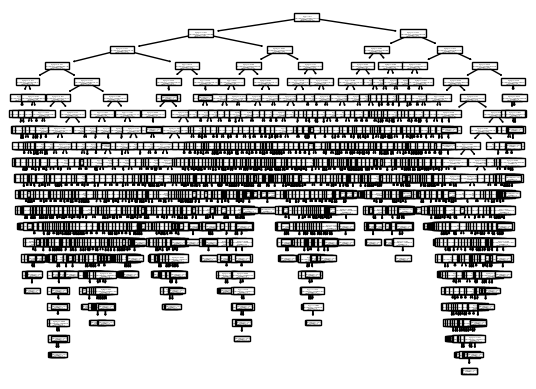

In [47]:
#show the decsision tree
plot_tree(dt)

In [48]:
#predict and show error rate
y_train_pred = dt.predict(x_train_scaled)
y_test_pred = dt.predict(x_test_scaled)
print("Training set pred score: ",np.around(r2_score(y_true = y_train,y_pred = y_train_pred),2)* 100,'%' )
print("Test set  pred score: ",np.around(r2_score(y_true = y_test,y_pred = y_test_pred),2)* 100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_test_pred))))

Training set pred score:  100.0 %
Test set  pred score:  50.0 %
Root Mean Squared Error: 0.22095100712232704


In [49]:
#model 4  --- > random forest
#create random forest object object
rf  = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

print("Training set score: ",np.around(rf.score(x_train_scaled, y_train),2)* 100,'%' )
print("Test set score: ",np.around(rf.score(x_test_scaled, y_test),2)* 100,'%')

Training set score:  96.0 %
Test set score:  76.0 %


In [50]:
#predict and show error rate
y_train_pred = rf.predict(x_train_scaled)
y_test_pred = rf.predict(x_test_scaled)
print("Training set pred score: ",np.around(r2_score(y_true = y_train,y_pred = y_train_pred),2)* 100,'%' )
print("Test set  pred score: ",np.around(r2_score(y_true = y_test,y_pred = y_test_pred),2)* 100,'%')
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(np.log(y_test), np.log(y_test_pred))))

Training set pred score:  96.0 %
Test set  pred score:  76.0 %
Root Mean Squared Error: 0.146273304770203


In [51]:
#save and load our model
#we evaluate and choose the best model which is random forest
#save
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

In [52]:
#load test data and make the proper preprocessing
x=pd.read_csv('.//Data//test.csv')
x.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
37    1498         160       FV         30.0     3215   Pave  Pave      Reg   
165   1626          20       RL         85.0    10200   Pave   NaN      Reg   
1213  2674         120       RM          NaN     3072   Pave   NaN      Reg   
1352  2813          90       RL          NaN     9662   Pave   NaN      IR1   
1386  2847          60       RL         45.0     9468   Pave   NaN      IR2   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
37           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
165          Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1213         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1352         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1386         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  
37         0      4    2010     ConLD         Normal  
165        0      6    2009        WD         Normal  
1213       0      9    2006        WD         Normal  
1352       0      8    2006        WD         Normal  
1386       0      8    2006        WD         Normal  

[5 rows x 80 columns]

In [53]:
#cleaning
#check duplicates
x.duplicated().sum()

0

In [54]:
#fill missing values
lst=[]
for i in x.columns :
    print(f"for feature {i}",x[i].isna().sum())
    y=x[i].isna().sum()/x.shape[0] * 100
    if y >= 80 :
        lst.append(i)
print(lst)

for feature Id 0
for feature MSSubClass 0
for feature MSZoning 4
for feature LotFrontage 227
for feature LotArea 0
for feature Street 0
for feature Alley 1352
for feature LotShape 0
for feature LandContour 0
for feature Utilities 2
for feature LotConfig 0
for feature LandSlope 0
for feature Neighborhood 0
for feature Condition1 0
for feature Condition2 0
for feature BldgType 0
for feature HouseStyle 0
for feature OverallQual 0
for feature OverallCond 0
for feature YearBuilt 0
for feature YearRemodAdd 0
for feature RoofStyle 0
for feature RoofMatl 0
for feature Exterior1st 1
for feature Exterior2nd 1
for feature MasVnrType 16
for feature MasVnrArea 15
for feature ExterQual 0
for feature ExterCond 0
for feature Foundation 0
for feature BsmtQual 44
for feature BsmtCond 45
for feature BsmtExposure 44
for feature BsmtFinType1 42
for feature BsmtFinSF1 1
for feature BsmtFinType2 42
for feature BsmtFinSF2 1
for feature BsmtUnfSF 1
for feature TotalBsmtSF 1
for feature Heating 0
for feature He

In [55]:
#drop unnecassary columns
x.drop(lst,axis=1,inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [56]:
#fill na values
for i in x.columns :
    print(f"for feature {i}",x[i].isna().sum()/x.shape[0] * 100,' %')
    if x[i].dtype == 'O':
        x[i]=x[i].fillna(x[i].mode()[0])
    else :
        x[i]=x[i].fillna(x[i].mean())
x.info()   

for feature Id 0.0  %
for feature MSSubClass 0.0  %
for feature MSZoning 0.2741603838245374  %
for feature LotFrontage 15.558601782042494  %
for feature LotArea 0.0  %
for feature Street 0.0  %
for feature LotShape 0.0  %
for feature LandContour 0.0  %
for feature Utilities 0.1370801919122687  %
for feature LotConfig 0.0  %
for feature LandSlope 0.0  %
for feature Neighborhood 0.0  %
for feature Condition1 0.0  %
for feature Condition2 0.0  %
for feature BldgType 0.0  %
for feature HouseStyle 0.0  %
for feature OverallQual 0.0  %
for feature OverallCond 0.0  %
for feature YearBuilt 0.0  %
for feature YearRemodAdd 0.0  %
for feature RoofStyle 0.0  %
for feature RoofMatl 0.0  %
for feature Exterior1st 0.06854009595613435  %
for feature Exterior2nd 0.06854009595613435  %
for feature MasVnrType 1.0966415352981496  %
for feature MasVnrArea 1.0281014393420151  %
for feature ExterQual 0.0  %
for feature ExterCond 0.0  %
for feature Foundation 0.0  %
for feature BsmtQual 3.015764222069911  %
f

for feature HalfBath 0.0  %
for feature BedroomAbvGr 0.0  %
for feature KitchenAbvGr 0.0  %
for feature KitchenQual 0.06854009595613435  %
for feature TotRmsAbvGrd 0.0  %
for feature Functional 0.1370801919122687  %
for feature Fireplaces 0.0  %
for feature FireplaceQu 50.03427004797807  %
for feature GarageType 5.20904729266621  %
for feature GarageYrBlt 5.346127484578479  %
for feature GarageFinish 5.346127484578479  %
for feature GarageCars 0.06854009595613435  %
for feature GarageArea 0.06854009595613435  %
for feature GarageQual 5.346127484578479  %
for feature GarageCond 5.346127484578479  %
for feature PavedDrive 0.0  %
for feature WoodDeckSF 0.0  %
for feature OpenPorchSF 0.0  %
for feature EnclosedPorch 0.0  %
for feature 3SsnPorch 0.0  %
for feature ScreenPorch 0.0  %
for feature PoolArea 0.0  %
for feature MiscVal 0.0  %
for feature MoSold 0.0  %
for feature YrSold 0.0  %
for feature SaleType 0.06854009595613435  %
for feature SaleCondition 0.0  %
<class 'pandas.core.frame.D

In [57]:
#check columns
#rename columns
x.columns=x.columns.str.lower().str.strip().str.replace(" ","_")
x.columns
#convert data types of columns
lst_obj=[]
lst_num=[]
for i in x.columns :
    if x[i].dtype == 'O':
        lst_obj.append(i)
    else :
        lst_num.append(i)
for i in lst_num :
    print(f'for feature {i}',x[i].dtype)
    x[i]=x[i].astype(int)
    print()
x.info()

for feature id int64

for feature mssubclass int64

for feature lotfrontage float64

for feature lotarea int64

for feature overallqual int64

for feature overallcond int64

for feature yearbuilt int64

for feature yearremodadd int64

for feature masvnrarea float64

for feature bsmtfinsf1 float64

for feature bsmtfinsf2 float64

for feature bsmtunfsf float64

for feature totalbsmtsf float64

for feature 1stflrsf int64

for feature 2ndflrsf int64

for feature lowqualfinsf int64

for feature grlivarea int64

for feature bsmtfullbath float64

for feature bsmthalfbath float64

for feature fullbath int64

for feature halfbath int64

for feature bedroomabvgr int64

for feature kitchenabvgr int64

for feature totrmsabvgrd int64

for feature fireplaces int64

for feature garageyrblt float64

for feature garagecars float64

for feature garagearea float64

for feature wooddecksf int64

for feature openporchsf int64

for feature enclosedporch int64

for feature 3ssnporch int64

for feature screen

In [58]:
#check rows
x.describe()
lst=[]
for i in x.columns:
    if x[i].dtypes == 'int64' or x[i].dtypes == 'float64':
        print(x[x[i] < 0 ] )      
#rows are ok
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1459 non-null   int32 
 1   mssubclass     1459 non-null   int32 
 2   mszoning       1459 non-null   object
 3   lotfrontage    1459 non-null   int32 
 4   lotarea        1459 non-null   int32 
 5   street         1459 non-null   object
 6   lotshape       1459 non-null   object
 7   landcontour    1459 non-null   object
 8   utilities      1459 non-null   object
 9   lotconfig      1459 non-null   object
 10  landslope      1459 non-null   object
 11  neighborhood   1459 non-null   object
 12  condition1     1459 non-null   object
 13  condition2     1459 non-null   object
 14  bldgtype       1459 non-null   object
 15  housestyle     1459 non-null   object
 16  overallqual    1459 non-null   int32 
 17  overallcond    1459 non-null   int32 
 18  yearbuilt      1459 non-null

In [59]:
#detect and handle
lst_num.remove('id')
for i in lst_num :
    #detect
    outliers=detect_outliers(x,0,[i])
    #handel
    x[i].iloc[outliers]=x[i].median()
    x[i]=x[i].astype(int)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1459 non-null   int32 
 1   mssubclass     1459 non-null   int32 
 2   mszoning       1459 non-null   object
 3   lotfrontage    1459 non-null   int32 
 4   lotarea        1459 non-null   int32 
 5   street         1459 non-null   object
 6   lotshape       1459 non-null   object
 7   landcontour    1459 non-null   object
 8   utilities      1459 non-null   object
 9   lotconfig      1459 non-null   object
 10  landslope      1459 non-null   object
 11  neighborhood   1459 non-null   object
 12  condition1     1459 non-null   object
 13  condition2     1459 non-null   object
 14  bldgtype       1459 non-null   object
 15  housestyle     1459 non-null   object
 16  overallqual    1459 non-null   int32 
 17  overallcond    1459 non-null   int32 
 18  yearbuilt      1459 non-null

<AxesSubplot:>

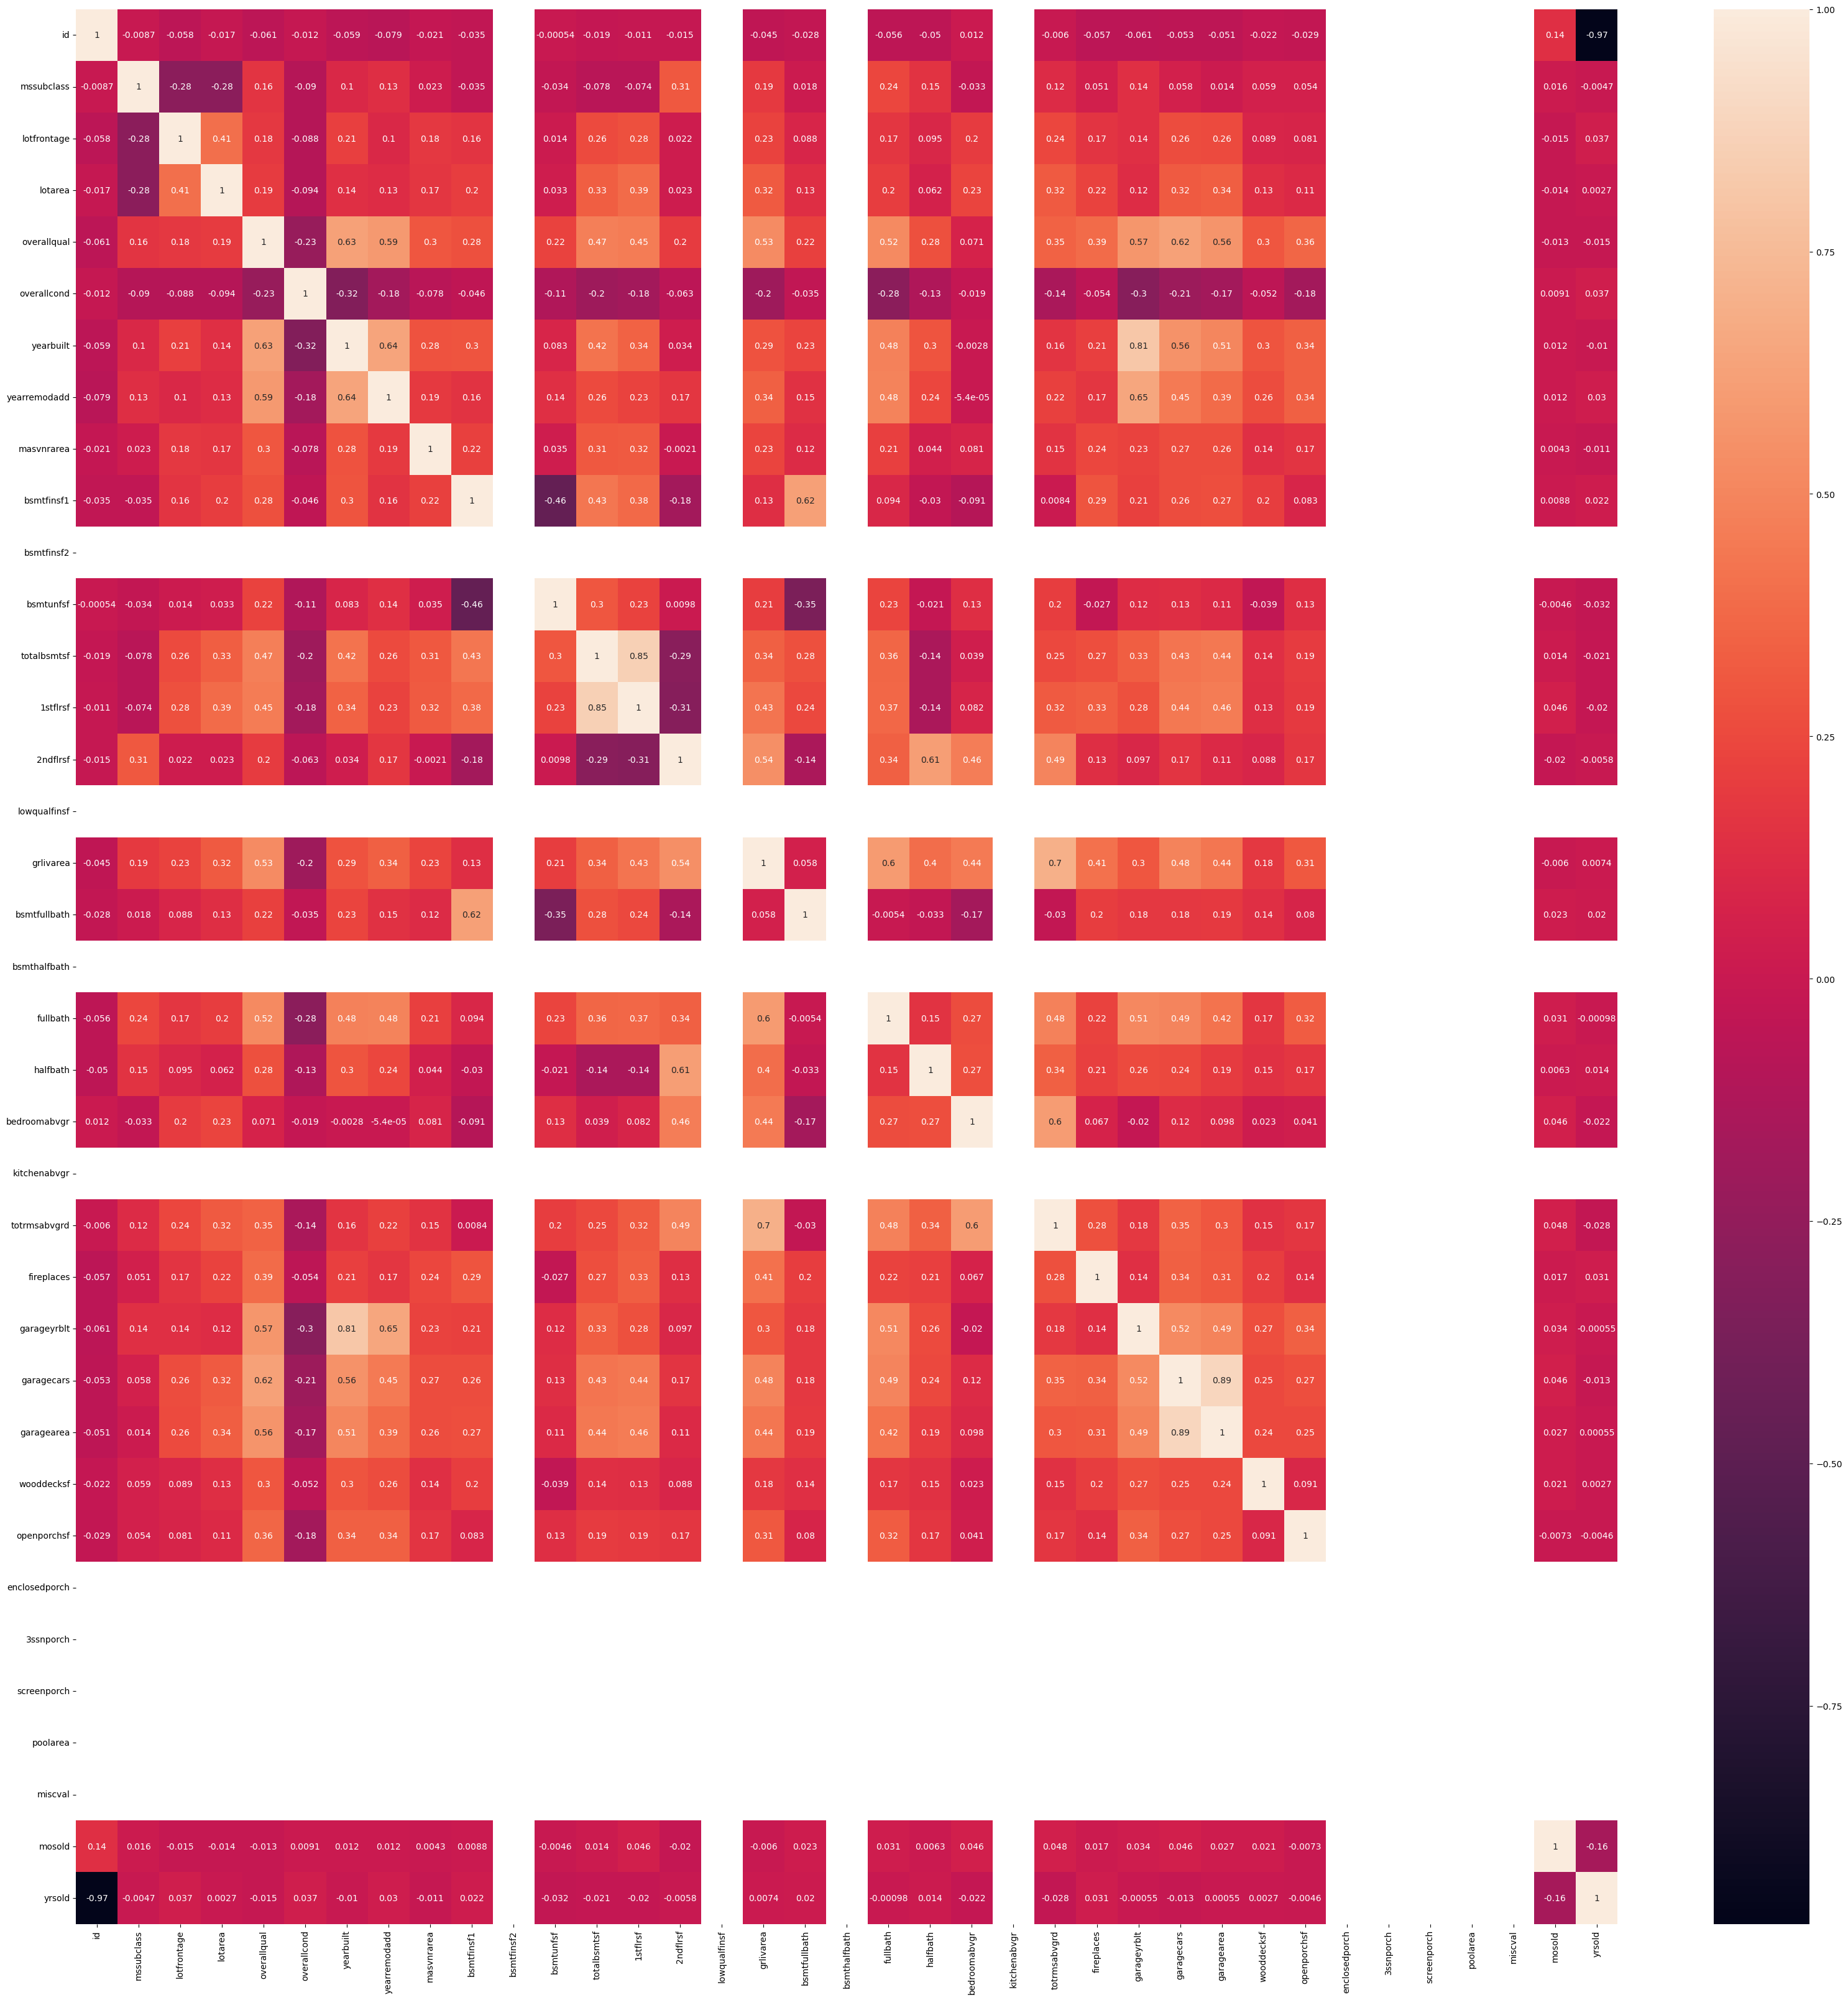

In [60]:
#correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
sns.heatmap(x.corr(), annot=True )

In [61]:
#no dependent features
#work with categorical data 
#check and decide the encoding stategy
#update objects list
lst_obj=[]
for i in x.columns :
    if x[i].dtype == 'O':
        lst_obj.append(i)
for i in lst_obj:
    print(f"for feature {i}\n",x[i].value_counts())
    print()
    print("-----------------------------------------------------------------------------")

for feature mszoning
 RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: mszoning, dtype: int64

-----------------------------------------------------------------------------
for feature street
 Pave    1453
Grvl       6
Name: street, dtype: int64

-----------------------------------------------------------------------------
for feature lotshape
 Reg    934
IR1    484
IR2     35
IR3      6
Name: lotshape, dtype: int64

-----------------------------------------------------------------------------
for feature landcontour
 Lvl    1311
HLS      70
Bnk      54
Low      24
Name: landcontour, dtype: int64

-----------------------------------------------------------------------------
for feature utilities
 AllPub    1459
Name: utilities, dtype: int64

-----------------------------------------------------------------------------
for feature lotconfig
 Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: lotconfig, dtype: int64


In [62]:
x.drop(['street','utilities'],axis=1,inplace=True)
x_c=x.copy()
x_c.isna().sum()
x_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1459 non-null   int32 
 1   mssubclass     1459 non-null   int32 
 2   mszoning       1459 non-null   object
 3   lotfrontage    1459 non-null   int32 
 4   lotarea        1459 non-null   int32 
 5   lotshape       1459 non-null   object
 6   landcontour    1459 non-null   object
 7   lotconfig      1459 non-null   object
 8   landslope      1459 non-null   object
 9   neighborhood   1459 non-null   object
 10  condition1     1459 non-null   object
 11  condition2     1459 non-null   object
 12  bldgtype       1459 non-null   object
 13  housestyle     1459 non-null   object
 14  overallqual    1459 non-null   int32 
 15  overallcond    1459 non-null   int32 
 16  yearbuilt      1459 non-null   int32 
 17  yearremodadd   1459 non-null   int32 
 18  roofstyle      1459 non-null

In [63]:
#work with ordinal
dic={
    
  'RL' : 0 ,
  'RM' : 1,
  'FV' : 2,
  'RH' : 3  
    
    
}
x_c['mszoning']=x_c['mszoning'].map(dic)
x_c

id  mssubclass  mszoning  lotfrontage  lotarea lotshape landcontour  \
0     1461          20       3.0           80    11622      Reg         Lvl   
1     1462          20       0.0           81    14267      IR1         Lvl   
2     1463          60       0.0           74    13830      IR1         Lvl   
3     1464          60       0.0           78     9978      IR1         Lvl   
4     1465         120       0.0           43     5005      IR1         HLS   
...    ...         ...       ...          ...      ...      ...         ...   
1454  2915          50       1.0           68     1936      Reg         Lvl   
1455  2916          50       1.0           68     1894      Reg         Lvl   
1456  2917          20       0.0           68     9399      Reg         Lvl   
1457  2918          85       0.0           62    10441      Reg         Lvl   
1458  2919          60       0.0           74     9627      Reg         Lvl   

     lotconfig landslope neighborhood  ... openporchsf enclosedporch  \
0       Inside       Gtl        NAmes  ...           0             0   
1       Corner       Gtl        NAmes  ...          36             0   
2       Inside       Gtl      Gilbert  ...          34             0   
3       Inside       Gtl      Gilbert  ...          36             0   
4       Inside       Gtl      StoneBr  ...          82             0   
...        ...       ...          ...  ...         ...           ...   
1454    Inside       Gtl      MeadowV  ...           0             0   
1455    Inside       Gtl      MeadowV  ...          24             0   
1456    Inside       Gtl      Mitchel  ...           0             0   
1457    Inside       Gtl      Mitchel  ...          32             0   
1458    Inside       Mod      Mitchel  ...          48             0   

     3ssnporch screenporch  poolarea  miscval  mosold  yrsold saletype  \
0            0           0         0        0       6    2010       WD   
1            0           0         0        0       6    2010       WD   
2            0           0         0        0       3    2010       WD   
3            0           0         0        0       6    2010       WD   
4            0           0         0        0       1    2010       WD   
...        ...         ...       ...      ...     ...     ...      ...   
1454         0           0         0        0       6    2006       WD   
1455         0           0         0        0       4    2006       WD   
1456         0           0         0        0       9    2006       WD   
1457         0           0         0        0       7    2006       WD   
1458         0           0         0        0      11    2006       WD   

     salecondition  
0           Normal  
1           Normal  
2           Normal  
3           Normal  
4           Normal  
...            ...  
1454        Normal  
1455       Abnorml  
1456       Abnorml  
1457        Normal  
1458        Normal  

[1459 rows x 74 columns]

In [64]:
dic={
  'Reg' :0,
  'IR1' :1,
  'IR2' :2,
  'IR3' :3
    
    
}
x_c['lotshape']=x_c['lotshape'].map(dic)
x_c

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape landcontour  \
0     1461          20       3.0           80    11622         0         Lvl   
1     1462          20       0.0           81    14267         1         Lvl   
2     1463          60       0.0           74    13830         1         Lvl   
3     1464          60       0.0           78     9978         1         Lvl   
4     1465         120       0.0           43     5005         1         HLS   
...    ...         ...       ...          ...      ...       ...         ...   
1454  2915          50       1.0           68     1936         0         Lvl   
1455  2916          50       1.0           68     1894         0         Lvl   
1456  2917          20       0.0           68     9399         0         Lvl   
1457  2918          85       0.0           62    10441         0         Lvl   
1458  2919          60       0.0           74     9627         0         Lvl   

     lotconfig landslope neighborhood  ... openporchsf enclosedporch  \
0       Inside       Gtl        NAmes  ...           0             0   
1       Corner       Gtl        NAmes  ...          36             0   
2       Inside       Gtl      Gilbert  ...          34             0   
3       Inside       Gtl      Gilbert  ...          36             0   
4       Inside       Gtl      StoneBr  ...          82             0   
...        ...       ...          ...  ...         ...           ...   
1454    Inside       Gtl      MeadowV  ...           0             0   
1455    Inside       Gtl      MeadowV  ...          24             0   
1456    Inside       Gtl      Mitchel  ...           0             0   
1457    Inside       Gtl      Mitchel  ...          32             0   
1458    Inside       Mod      Mitchel  ...          48             0   

     3ssnporch screenporch  poolarea  miscval  mosold  yrsold saletype  \
0            0           0         0        0       6    2010       WD   
1            0           0         0        0       6    2010       WD   
2            0           0         0        0       3    2010       WD   
3            0           0         0        0       6    2010       WD   
4            0           0         0        0       1    2010       WD   
...        ...         ...       ...      ...     ...     ...      ...   
1454         0           0         0        0       6    2006       WD   
1455         0           0         0        0       4    2006       WD   
1456         0           0         0        0       9    2006       WD   
1457         0           0         0        0       7    2006       WD   
1458         0           0         0        0      11    2006       WD   

     salecondition  
0           Normal  
1           Normal  
2           Normal  
3           Normal  
4           Normal  
...            ...  
1454        Normal  
1455       Abnorml  
1456       Abnorml  
1457        Normal  
1458        Normal  

[1459 rows x 74 columns]

In [65]:
x_c.drop(['condition2','roofmatl','bsmtfintype2','heating'],axis=1,inplace=True)

In [66]:
#one hot encodng
#create one hot encoding object
lst_small=['landcontour','lotconfig','landslope','bldgtype','roofstyle','masvnrtype','exterqual','extercond','bsmtqual',
          'bsmtcond','bsmtexposure','heatingqc','centralair','electrical','kitchenqual','fireplacequ','garagetype',
          'garagefinish','garagequal','garagecond','paveddrive','salecondition','foundation'
          ]   
ohe = OneHotEncoder(sparse=False )
x_ohe = pd.DataFrame(ohe.fit_transform(x_c[lst_small]) , columns=ohe.get_feature_names_out())
x_ohe

landcontour_Bnk  landcontour_HLS  landcontour_Low  landcontour_Lvl  \
0                 0.0              0.0              0.0              1.0   
1                 0.0              0.0              0.0              1.0   
2                 0.0              0.0              0.0              1.0   
3                 0.0              0.0              0.0              1.0   
4                 0.0              1.0              0.0              0.0   
...               ...              ...              ...              ...   
1454              0.0              0.0              0.0              1.0   
1455              0.0              0.0              0.0              1.0   
1456              0.0              0.0              0.0              1.0   
1457              0.0              0.0              0.0              1.0   
1458              0.0              0.0              0.0              1.0   

      lotconfig_Corner  lotconfig_CulDSac  lotconfig_FR2  lotconfig_FR3  \
0                  0.0                0.0            0.0            0.0   
1                  1.0                0.0            0.0            0.0   
2                  0.0                0.0            0.0            0.0   
3                  0.0                0.0            0.0            0.0   
4                  0.0                0.0            0.0            0.0   
...                ...                ...            ...            ...   
1454               0.0                0.0            0.0            0.0   
1455               0.0                0.0            0.0            0.0   
1456               0.0                0.0            0.0            0.0   
1457               0.0                0.0            0.0            0.0   
1458               0.0                0.0            0.0            0.0   

      lotconfig_Inside  landslope_Gtl  ...  salecondition_Alloca  \
0                  1.0            1.0  ...                   0.0   
1                  0.0            1.0  ...                   0.0   
2                  1.0            1.0  ...                   0.0   
3                  1.0            1.0  ...                   0.0   
4                  1.0            1.0  ...                   0.0   
...                ...            ...  ...                   ...   
1454               1.0            1.0  ...                   0.0   
1455               1.0            1.0  ...                   0.0   
1456               1.0            1.0  ...                   0.0   
1457               1.0            1.0  ...                   0.0   
1458               1.0            0.0  ...                   0.0   

      salecondition_Family  salecondition_Normal  salecondition_Partial  \
0                      0.0                   1.0                    0.0   
1                      0.0                   1.0                    0.0   
2                      0.0                   1.0                    0.0   
3                      0.0                   1.0                    0.0   
4                      0.0                   1.0                    0.0   
...                    ...                   ...                    ...   
1454                   0.0                   1.0                    0.0   
1455                   0.0                   0.0                    0.0   
1456                   0.0                   0.0                    0.0   
1457                   0.0                   1.0                    0.0   
1458                   0.0                   1.0                    0.0   

      foundation_BrkTil  foundation_CBlock  foundation_PConc  foundation_Slab  \
0                   0.0                1.0               0.0              0.0   
1                   0.0                1.0               0.0              0.0   
2                   0.0                0.0               1.0              0.0   
3                   0.0                0.0               1.0              0.0   
4                   0.0                0.0               1.0         

In [67]:
#binary encoding
#create binary encoding object
lst_big=['neighborhood','condition1','housestyle','exterior1st','exterior2nd','bsmtfintype1','functional','saletype']
from category_encoders import BinaryEncoder
be = BinaryEncoder()
be_df = be.fit_transform(x_c[lst_big])
be_df

neighborhood_0  neighborhood_1  neighborhood_2  neighborhood_3  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               1   
3                  0               0               0               1   
4                  0               0               0               1   
...              ...             ...             ...             ...   
1454               1               1               0               0   
1455               1               1               0               0   
1456               1               0               1               1   
1457               1               0               1               1   
1458               1               0               1               1   

      neighborhood_4  condition1_0  condition1_1  condition1_2  condition1_3  \
0                  1             0             0             0             1   
1                  1             0             0             1             0   
2                  0             0             0             1             0   
3                  0             0             0             1             0   
4                  1             0             0             1             0   
...              ...           ...           ...           ...           ...   
1454               0             0             0             1             0   
1455               0             0             0             1             0   
1456               0             0             0             1             0   
1457               0             0             0             1             0   
1458               0             0             0             1             0   

      housestyle_0  ...  bsmtfintype1_0  bsmtfintype1_1  bsmtfintype1_2  \
0                0  ...               0               0               1   
1                0  ...               0               1               0   
2                0  ...               0               1               1   
3                0  ...               0               1               1   
4                0  ...               0               1               0   
...            ...  ...             ...             ...             ...   
1454             0  ...               1               0               0   
1455             0  ...               0               0               1   
1456             0  ...               0               1               0   
1457             1  ...               0               1               1   
1458             0  ...               1               1               0   

      functional_0  functional_1  functional_2  saletype_0  saletype_1  \
0                0             0             1           0           0   
1                0             0             1           0           0   
2                0             0             1           0           0   
3                0             0             1           0           0   
4                0             0             1           0           0   
...            ...           ...           ...         ...         ...   
1454             0             0             1           0           0   
1455             0             0             1           0           0   
1456             0             0             1           0           0   
1457             0             0             1           0           0   
1458             0             0             1           0           0   

      saletype_2  saletype_3  
0              0           1  
1              0           1  
2              0           1  
3              0           1  
4              0           1  
...          ...         ...  
1454           0           1  
1455           0           1  
1456           0           1  
1457           0           1  
1458           0           1  

[1459 rows x 30 c

In [68]:
x_c = pd.concat([x_c , x_ohe ,be_df ] , axis = 1)
x_c.drop(lst_small + lst_big , axis = 1 , inplace = True )
x_c

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape  overallqual  \
0     1461          20       3.0           80    11622         0            5   
1     1462          20       0.0           81    14267         1            6   
2     1463          60       0.0           74    13830         1            5   
3     1464          60       0.0           78     9978         1            6   
4     1465         120       0.0           43     5005         1            8   
...    ...         ...       ...          ...      ...       ...          ...   
1454  2915          50       1.0           68     1936         0            4   
1455  2916          50       1.0           68     1894         0            4   
1456  2917          20       0.0           68     9399         0            5   
1457  2918          85       0.0           62    10441         0            5   
1458  2919          60       0.0           74     9627         0            7   

      overallcond  yearbuilt  yearremodadd  ...  bsmtfintype1_0  \
0               6       1961          1961  ...               0   
1               6       1958          1958  ...               0   
2               5       1997          1998  ...               0   
3               6       1998          1998  ...               0   
4               5       1992          1992  ...               0   
...           ...        ...           ...  ...             ...   
1454            7       1970          1970  ...               1   
1455            5       1970          1970  ...               0   
1456            7       1960          1996  ...               0   
1457            5       1992          1992  ...               0   
1458            5       1993          1994  ...               1   

      bsmtfintype1_1  bsmtfintype1_2  functional_0  functional_1  \
0                  0               1             0             0   
1                  1               0             0             0   
2                  1               1             0             0   
3                  1               1             0             0   
4                  1               0             0             0   
...              ...             ...           ...           ...   
1454               0               0             0             0   
1455               0               1             0             0   
1456               1               0             0             0   
1457               1               1             0             0   
1458               1               0             0             0   

      functional_2  saletype_0  saletype_1  saletype_2  saletype_3  
0                1           0           0           0           1  
1                1           0           0           0           1  
2                1           0           0           0           1  
3                1           0           0           0           1  
4                1           0           0           0           1  
...            ...         ...         ...         ...         ...  
1454             1           0           0           0           1  
1455             1           0           0           0           1  
1456             1           0           0           0           1  
1457             1           0           0           0           1  
1458             1           0           0           0           1  

[1459 rows x 170 columns]

In [69]:
#check if there are no categorical data left
lst_obj_c=[]
for i in x_c.columns:
    if x_c[i].dtype == 'O':
        lst_obj_c.append(i)
print(lst_obj_c)  
if len(lst_obj_c) == 0 :
    print('There is no categorical data left')
else :
    print('There is categorical data left') 
    

[]
There is no categorical data left


In [70]:
#fill missing values and convert to int after encoding phase
#fill missing values
for i in x_c.columns :
    print(f"for feature {i}",x_c[i].isna().sum())    
#fill na values
for i in x_c.columns :
    print(f"for feature {i}",x_c[i].isna().sum()/x_c.shape[0] * 100,' %')
    if x_c[i].dtype == 'O':
        x_c[i]=x_c[i].fillna(x_c[i].mode()[0])
    else :
        x_c[i]=x_c[i].fillna(x_c[i].mean())    
for i in x_c.columns :
    if x_c[i].dtype == 'float64':
        x_c[i]=x_c[i].astype(int)
x_c.info()       

for feature id 0
for feature mssubclass 0
for feature mszoning 15
for feature lotfrontage 0
for feature lotarea 0
for feature lotshape 0
for feature overallqual 0
for feature overallcond 0
for feature yearbuilt 0
for feature yearremodadd 0
for feature masvnrarea 0
for feature bsmtfinsf1 0
for feature bsmtfinsf2 0
for feature bsmtunfsf 0
for feature totalbsmtsf 0
for feature 1stflrsf 0
for feature 2ndflrsf 0
for feature lowqualfinsf 0
for feature grlivarea 0
for feature bsmtfullbath 0
for feature bsmthalfbath 0
for feature fullbath 0
for feature halfbath 0
for feature bedroomabvgr 0
for feature kitchenabvgr 0
for feature totrmsabvgrd 0
for feature fireplaces 0
for feature garageyrblt 0
for feature garagecars 0
for feature garagearea 0
for feature wooddecksf 0
for feature openporchsf 0
for feature enclosedporch 0
for feature 3ssnporch 0
for feature screenporch 0
for feature poolarea 0
for feature miscval 0
for feature mosold 0
for feature yrsold 0
for feature landcontour_Bnk 0
for featur

for feature mssubclass 0.0  %
for feature mszoning 1.0281014393420151  %
for feature lotfrontage 0.0  %
for feature lotarea 0.0  %
for feature lotshape 0.0  %
for feature overallqual 0.0  %
for feature overallcond 0.0  %
for feature yearbuilt 0.0  %
for feature yearremodadd 0.0  %
for feature masvnrarea 0.0  %
for feature bsmtfinsf1 0.0  %
for feature bsmtfinsf2 0.0  %
for feature bsmtunfsf 0.0  %
for feature totalbsmtsf 0.0  %
for feature 1stflrsf 0.0  %
for feature 2ndflrsf 0.0  %
for feature lowqualfinsf 0.0  %
for feature grlivarea 0.0  %
for feature bsmtfullbath 0.0  %
for feature bsmthalfbath 0.0  %
for feature fullbath 0.0  %
for feature halfbath 0.0  %
for feature bedroomabvgr 0.0  %
for feature kitchenabvgr 0.0  %
for feature totrmsabvgrd 0.0  %
for feature fireplaces 0.0  %
for feature garageyrblt 0.0  %
for feature garagecars 0.0  %
for feature garagearea 0.0  %
for feature wooddecksf 0.0  %
for feature openporchsf 0.0  %
for feature enclosedporch 0.0  %
for feature 3ssnporc

In [71]:
x_c

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape  overallqual  \
0     1461          20         3           80    11622         0            5   
1     1462          20         0           81    14267         1            6   
2     1463          60         0           74    13830         1            5   
3     1464          60         0           78     9978         1            6   
4     1465         120         0           43     5005         1            8   
...    ...         ...       ...          ...      ...       ...          ...   
1454  2915          50         1           68     1936         0            4   
1455  2916          50         1           68     1894         0            4   
1456  2917          20         0           68     9399         0            5   
1457  2918          85         0           62    10441         0            5   
1458  2919          60         0           74     9627         0            7   

      overallcond  yearbuilt  yearremodadd  ...  bsmtfintype1_0  \
0               6       1961          1961  ...               0   
1               6       1958          1958  ...               0   
2               5       1997          1998  ...               0   
3               6       1998          1998  ...               0   
4               5       1992          1992  ...               0   
...           ...        ...           ...  ...             ...   
1454            7       1970          1970  ...               1   
1455            5       1970          1970  ...               0   
1456            7       1960          1996  ...               0   
1457            5       1992          1992  ...               0   
1458            5       1993          1994  ...               1   

      bsmtfintype1_1  bsmtfintype1_2  functional_0  functional_1  \
0                  0               1             0             0   
1                  1               0             0             0   
2                  1               1             0             0   
3                  1               1             0             0   
4                  1               0             0             0   
...              ...             ...           ...           ...   
1454               0               0             0             0   
1455               0               1             0             0   
1456               1               0             0             0   
1457               1               1             0             0   
1458               1               0             0             0   

      functional_2  saletype_0  saletype_1  saletype_2  saletype_3  
0                1           0           0           0           1  
1                1           0           0           0           1  
2                1           0           0           0           1  
3                1           0           0           0           1  
4                1           0           0           0           1  
...            ...         ...         ...         ...         ...  
1454             1           0           0           0           1  
1455             1           0           0           0           1  
1456             1           0           0           0           1  
1457             1           0           0           0           1  
1458             1           0           0           0           1  

[1459 rows x 170 columns]

In [72]:
#reuse the model
#load the model
pickled_model = pickle.load(open('model.pkl', 'rb'))
#add the matching features
lst_1=x_c.columns
lst_2=x_train.columns

In [73]:
lst_1

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'lotshape',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       ...
       'bsmtfintype1_0', 'bsmtfintype1_1', 'bsmtfintype1_2', 'functional_0',
       'functional_1', 'functional_2', 'saletype_0', 'saletype_1',
       'saletype_2', 'saletype_3'],
      dtype='object', length=170)

In [74]:
lst_2

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'lotshape',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       ...
       'bsmtfintype1_0', 'bsmtfintype1_1', 'bsmtfintype1_2', 'functional_0',
       'functional_1', 'functional_2', 'saletype_0', 'saletype_1',
       'saletype_2', 'saletype_3'],
      dtype='object', length=174)

In [75]:
lst_3=[]
for i in lst_2:
    if i not in lst_1:
        lst_3.append(i)
lst_3        

['electrical_Mix', 'garagequal_Ex', 'housestyle_3', 'exterior2nd_4']

In [76]:
#make features equal so that we can reuse model
x_final = pd.concat([x_c , df_c[lst_3] ] , axis = 1)
x_final

id  mssubclass  mszoning  lotfrontage  lotarea  lotshape  \
0     1461.0        20.0       3.0         80.0  11622.0       0.0   
1     1462.0        20.0       0.0         81.0  14267.0       1.0   
2     1463.0        60.0       0.0         74.0  13830.0       1.0   
3     1464.0        60.0       0.0         78.0   9978.0       1.0   
4     1465.0       120.0       0.0         43.0   5005.0       1.0   
...      ...         ...       ...          ...      ...       ...   
1455  2916.0        50.0       1.0         68.0   1894.0       0.0   
1456  2917.0        20.0       0.0         68.0   9399.0       0.0   
1457  2918.0        85.0       0.0         62.0  10441.0       0.0   
1458  2919.0        60.0       0.0         74.0   9627.0       0.0   
1459     NaN         NaN       NaN          NaN      NaN       NaN   

      overallqual  overallcond  yearbuilt  yearremodadd  ...  functional_1  \
0             5.0          6.0     1961.0        1961.0  ...           0.0   
1             6.0          6.0     1958.0        1958.0  ...           0.0   
2             5.0          5.0     1997.0        1998.0  ...           0.0   
3             6.0          6.0     1998.0        1998.0  ...           0.0   
4             8.0          5.0     1992.0        1992.0  ...           0.0   
...           ...          ...        ...           ...  ...           ...   
1455          4.0          5.0     1970.0        1970.0  ...           0.0   
1456          5.0          7.0     1960.0        1996.0  ...           0.0   
1457          5.0          5.0     1992.0        1992.0  ...           0.0   
1458          7.0          5.0     1993.0        1994.0  ...           0.0   
1459          NaN          NaN        NaN           NaN  ...           NaN   

      functional_2  saletype_0  saletype_1  saletype_2  saletype_3  \
0              1.0         0.0         0.0         0.0         1.0   
1              1.0         0.0         0.0         0.0         1.0   
2              1.0         0.0         0.0         0.0         1.0   
3              1.0         0.0         0.0         0.0         1.0   
4              1.0         0.0         0.0         0.0         1.0   
...            ...         ...         ...         ...         ...   
1455           1.0         0.0         0.0         0.0         1.0   
1456           1.0         0.0         0.0         0.0         1.0   
1457           1.0         0.0         0.0         0.0         1.0   
1458           1.0         0.0         0.0         0.0         1.0   
1459           NaN         NaN         NaN         NaN         NaN   

      electrical_Mix  garagequal_Ex  housestyle_3  exterior2nd_4  
0                  0              0             1              1  
1                  0              0             0              0  
2                  0              0             1              1  
3                  0              0             1              1  
4                  0              0             1              1  
...              ...            ...           ...            ...  
1455               0              0             1              1  
1456               0              0             0              1  
1457               0              0             1              1  
1458               0              0             0              0  
1459               0              0             0              0  

[1460 rows x 174 columns]

In [77]:
#fill missing values and convert to int after encoding phase
#fill missing values
lst=[]
for i in x_final.columns :
    print(f"for feature {i}",x_final[i].isna().sum())
    y=x_final[i].isna().sum()/x_final.shape[0] * 100
    if y >= 80 :
        lst.append(i)
print(lst)        
#fill na values
for i in x_final.columns :
    print(f"for feature {i}",x_final[i].isna().sum()/x_final.shape[0] * 100,' %')
    if x_final[i].dtype == 'O':
        x_final[i]=x_final[i].fillna(x_final[i].mode()[0])
    else :
        x_final[i]=x_final[i].fillna(x_final[i].mean())    
for i in x_final.columns :
    if x_final[i].dtype == 'float64':
        x_final[i]=x_final[i].astype(int)
x_final.info()  

for feature id 1
for feature mssubclass 1
for feature mszoning 1
for feature lotfrontage 1
for feature lotarea 1
for feature lotshape 1
for feature overallqual 1
for feature overallcond 1
for feature yearbuilt 1
for feature yearremodadd 1
for feature masvnrarea 1
for feature bsmtfinsf1 1
for feature bsmtfinsf2 1
for feature bsmtunfsf 1
for feature totalbsmtsf 1
for feature 1stflrsf 1
for feature 2ndflrsf 1
for feature lowqualfinsf 1
for feature grlivarea 1
for feature bsmtfullbath 1
for feature bsmthalfbath 1
for feature fullbath 1
for feature halfbath 1
for feature bedroomabvgr 1
for feature kitchenabvgr 1
for feature totrmsabvgrd 1
for feature fireplaces 1
for feature garageyrblt 1
for feature garagecars 1
for feature garagearea 1
for feature wooddecksf 1
for feature openporchsf 1
for feature enclosedporch 1
for feature 3ssnporch 1
for feature screenporch 1
for feature poolarea 1
for feature miscval 1
for feature mosold 1
for feature yrsold 1
for feature landcontour_Bnk 1
for feature

for feature centralair_Y 0.0684931506849315  %
for feature electrical_FuseA 0.0684931506849315  %
for feature electrical_FuseF 0.0684931506849315  %
for feature electrical_FuseP 0.0684931506849315  %
for feature electrical_SBrkr 0.0684931506849315  %
for feature kitchenqual_Ex 0.0684931506849315  %
for feature kitchenqual_Fa 0.0684931506849315  %
for feature kitchenqual_Gd 0.0684931506849315  %
for feature kitchenqual_TA 0.0684931506849315  %
for feature fireplacequ_Ex 0.0684931506849315  %
for feature fireplacequ_Fa 0.0684931506849315  %
for feature fireplacequ_Gd 0.0684931506849315  %
for feature fireplacequ_Po 0.0684931506849315  %
for feature fireplacequ_TA 0.0684931506849315  %
for feature garagetype_2Types 0.0684931506849315  %
for feature garagetype_Attchd 0.0684931506849315  %
for feature garagetype_Basment 0.0684931506849315  %
for feature garagetype_BuiltIn 0.0684931506849315  %
for feature garagetype_CarPort 0.0684931506849315  %
for feature garagetype_Detchd 0.0684931506849

In [78]:
#Standarization
#create standard scaler object
scaler = StandardScaler()
x_f = scaler.fit_transform(x_final)

In [79]:
#reuse model and predict
y=pickled_model.predict(x_f)
y_f=pd.DataFrame((y),columns=['predicted_price'])

In [80]:
y_f.isnull().sum()

predicted_price    0
dtype: int64

In [81]:
y_f['predicted_price']=y_f['predicted_price'].astype(int)
y_f

predicted_price
0              126000
1              157631
2              184850
3              176997
4              193280
...               ...
1455            97113
1456           154000
1457           108616
1458           240050
1459           160790

[1460 rows x 1 columns]

In [82]:
#concat predicted values with orginal data
x_pred=pd.concat([x['id'],y_f],axis=1)
x_pred.isna().sum()
x_pred.dropna(inplace=True)
x_pred

id  predicted_price
0     1461.0           126000
1     1462.0           157631
2     1463.0           184850
3     1464.0           176997
4     1465.0           193280
...      ...              ...
1454  2915.0            93513
1455  2916.0            97113
1456  2917.0           154000
1457  2918.0           108616
1458  2919.0           240050

[1459 rows x 2 columns]

In [83]:
x_pred['id']=x_pred['id'].astype(int)
x_pred

id  predicted_price
0     1461           126000
1     1462           157631
2     1463           184850
3     1464           176997
4     1465           193280
...    ...              ...
1454  2915            93513
1455  2916            97113
1456  2917           154000
1457  2918           108616
1458  2919           240050

[1459 rows x 2 columns]

In [84]:
#export csv with pedictions
x_pred.to_csv('.//Data//House_price_predictions.csv',index=False)